# Forecasting PM2.5 using big data analysis

## Table of Contents
* [Prerequisites](#Prerequisites)
* [Introduction](#Introduction)
* [Necessary imports](#Necessary-imports)
* [Connect to your ArcGIS Enterprise organization](#Connect-to-your-ArcGIS-Enterprise-organization)
* [Ensure your GIS supports GeoAnalytics](#Ensure-your-GIS-supports-GeoAnalytics)
* [Prepare data](#Prepare_data)
    * [Create a big data file share](#Create-a-big-data-file-share)
* [Get data for analysis](#Get-data-for-analysis)
    * [Search for big data file shares](#Search-for-big-data-file-shares)
    * [Search for feature layers](#Search-for-feature-layers)
* [Uncover patterns in data](#Uncover-patterns-in-data)
    * [Describe data](#Describe-data)
    * [Commonly used methods of measurement](#Commonly-used-methods-of-measurement)
    * [Average PM 2.5 value by county](#Average-PM-2.5-value-by-county)
* [Prepare time series data](#Prepare-time-series-data)   
* [Predict PM2.5 using Facebook's Prophet model](#Predict-PM2.5-using-Facebook's-Prophet-model)
* [Visualize result on Dashboard](#Visualize-result-on-Dashboard)
* [Conclusion](#Conclusion)
* [References](#References)

## Prerequisites

- The tools available in the ArcGIS API for Python geoanalytics module require an ArcGIS Enterprise licensed and configured with the linux based [ArcGIS GeoAnalytics server](http://enterprise.arcgis.com/en/server/latest/get-started/windows/configure-the-portal-with-arcgis-geoanalytics-server.htm).
- When ArcGIS GeoAnalytics Server is installed on Linux, additional configuration steps are required before using the RunPythonScript operation. Install and configure Python 3.6 for Linux on each machine in your GeoAnalytics Server site, ensuring that Python is installed into the same directory on each machine. For this analysis, you also need to install FB Prophet library in the same environment. Then, update the [ArcGIS Server Properties](https://developers.arcgis.com/rest/enterprise-administration/server/serverproperties.htm) on your GeoAnalytics Server site with the pysparkPython property. The value of this property should be the path to the Python executable on your GeoAnalytics Server machines, for example, {"pysparkPython":"path/to/environment"}. <img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABdAAAAGwCAYAAACpcEfYAAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAH1NSURBVHhe7d0NkBxpftf55o4IXo44c3FxUMH5DvqQsdsWeNoG0x1nsFUgYtXLrGPbbsLb3sFuF8uFaE+YpbYPD20di65OF4g6xYauvXE3URYwXHXABKXdGFMKM+tS2AxUG89S8t0ErfUKl2xkUxjB1Gi0s7W7vbv/y6zKl+ct36qrpe7W9xPxs3eqsjKffPLJbPW/sp+cEwAAAAAAAAAAYKGADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOBAAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6kEP38pzMzQVZa8ogeP1IPGjKargtP5e7wRuH0ZWaus6j3gccijbe5lal+SB4AwAAAAAAAE/UDAroI+m8VFKKPV6eq0svePepOBjK/q2GVDfKUj6rtO3MspTPV6R6oy37D4NlA4PdVX0frLiKWCMZ7DWlfnFV305pYbKdqw1p3enL6CBYPJejWOezaLbjkgI68htIc03payPzS2VZvbgtjVt9GQafMFFABwAAAAAAOB4OX0AfdaSqFIcmWZT6neD9J2x0tyGVM2Z7XClJ+ZP7waemKKAPe1J/3ijQJqS2F3wmy1Gs81k143FJAV1htO9pjMUnejwKSy+gazlTkcbdUfC52EkpoB/v4wAAAAAAAHB4hy6gD1/bVAo9cUozKfoVM9qrybKjLYlR2lisgN6T+pJrGXfyFRiPYp3PrlmPSwqFCgroGQoU0P2UVqRxN/joCcN5AQAAAAAATrtDFtCH0tpQCihqStvSsW+sPDqjrtSe09tQOleVxp4y3cnBSPp7TamtzU+WcRZTjTt1HcuMXq/G78+VZP16V/qPgzd93naG93vS3q3L5oX5XAXGo1jns2v245JCoYICegazgF7zrioh7zy+25Z6eA0Ks/SUp72aEucFAAAAAAA47Q5XQH/YkkpUBCrJ9tWaLKr/fdtVqdQL1Ku7A289PWlsrcryeOoVtdjkORhK72ZdNtfKslAKPzcvy2ubUt/tyiDYxPBmJVrnOGsN6afMEz64tS3lK9MV0PW71WczXc3h1zmU/q0ddz/d3LfmWta35/f5yPt8XSrnFqTkvba6+zNSi9bjZavjLaHrXVuM3y8Zx61ge2SvFq8ruNt/+GZDqmvLMu+/VuTO8anGZWDQleblSjAW56R0dkU2r7el8WL4eS9aodAxngcd2bm4Euy3t88bNWnfDxY/GEjn+qasBPPbzy9VpHarH7wZcqwzkrW9yTrrb1hHXC/qusa1/+XSRjna98m6ylLZ8ufdn7Qh8y81ovXmPc+H0r2xPR4n5SW9qBxuu31P3Rfj/LRiT3di71dJFs75z0LoyMC6RuRtd5q0AnpoJN3Ly8oyc7L5Wryf9vkZchzHx31pX60Ez0ww97/geRgYPeh4++ytUzkmpbPB8bjrf+qoj0OO/fwl/YuclRvmeWR8kbbRStxfAAAAAACAJIcqoPdvrMTFCf/O3sfdzKKrWXgpv1CRsvoZtVh0vy2bGdOaTIqLQ2lfVF8/TFHbKAw5Co3W9CClBVnxHwp4syv7g6Fjn7Mdap2Ps+dOL73QFLW8pBfoVqWyoRcv/X7tXVUK5HNV485tb5vKHf+LV5X7Z6doj15AL8v6RnlcyI9ecxyHJNONSxlPAaSPxYSkFNAXn19xTyNUWpfGraT5+Uta8dRZxI3k3J63zurr6l6mFdD70n5RL+bamZyX0xbQk89zs9jsyrxUboZ9oK/Xjlq4HUrnpYz9OlORVvjlxljedqfJU0D3aF/0eFHGZe4C+lrFGFPK/k9zHnot6F1b0c89K357jvo45NlPo0B+oaHvi9G/+vkAAAAAAACQzyEK6H1pXIiLE6WXJsWf7mW1YLMpbeuWP6NAdakj/aGjsDHqSU0tnvsP27sTrMy/K/1GZXxn8qS46C2rFbm23QWrXIzCkKtw+7Atm6mF1sldx809tfCZYep1DqT1QtznK5c70V35o3tNWVfWWbkZHwy9QOc/yHAg0VQ3oXsNKUfLGAWoO3Xlru4VadwLXp+yPWYBffv1vriGRbYpx6U5BdDSprTuBQ3wxlsr5x3oixeb0ns4eWfk9Z/2MNDnNqUZjmH/gbFKOzPvao+4the082FHttV90NaZXEDX/3pjVXbCNno9N7zTlOo5v++UIm6uKVz0diae5367NiZ3+e+H++EZ3e9ITS3+PqdPcZJn6pD+y8oXKXPLUrsd7Jd/R7kyRvXpU/K2O03OAro3VpsfVJY7HxeAcxfQP9KQ/fAE00x5XXh1XSmel7z9b8efe9CWbWMsHN1xyLefo9vbSnvLynXI6MMnPaUYAAAAAAA4NaYvoGvFVWVajL2adveiViQdSysOxvSinnk37UR/d13Wx5/X16kXnMz3lDgLPsbyCXc+571befnFtn5XZIqp1qkVsu0vDnpXlALVC61of5MLdCq9GK3eIdt/uRy/rt75OWV7XFO4TGXKcWmON3Oal+RCYdp4NoqAxnjTpsBJGbNpBXTz/NHamVZ4Vca1/pmK1/fmuebfob4Tr2uKAnrSeZ7qje3o8+aYyC7cettXzyXzrw60cap+OTSDdpt9nXh+JS+Xu4CecH2a7jzU/6rEuqPb5/81x1LcnqM7Djn301h//Jcw+ue1v5ABAAAAAAAoYOoCuj7/tXp3n1EwseadzVeg6l5S1mFNH2JKuwNd356WQxTQx4Z9ad+oSsWYu9lMoSJcwXX2X1ELbRkp1aI7PPMV0M3Ccngc+tI4H76mF6Onbc+sCujTjkt9vNkFx6MooCcfg7R1pr1n9n++wqvejiClBSmfr0j1elM64zmvFUdQQB896EnrRl2qG2Vvu+p83WEKFtCNv56wtj9sy6byfulKOBKLtdvN6OvE82sGd6AnXJ+mOg/v68e1/HL2V39Hdxzy7adPm2oq/EsFb7sr4WvaX8gAAAAAAAAUM2UB3bhTMTVmMTRPgSpvASrkT1egLq/Oga5vT8thC+iq0VAGd7vSulGV9eABkVHUO62LyLFOrYCVmbgf8xbQzQLX+A5RrSimf7kxbXtmU0Cfdlxmj7eTUkCfrvDal6Y6lYYj8xut+G7kmRbQ88y/7qdgAV0bT67tJ53nedudJuf1axZzoCdcn6Y6DzP7zHZ0xyHffo5pxfLSeDxqz0Hg4aEAAAAAAOAQpiugG392n5WVG+qdjHkKVCPpbKnrsO8INmkFEz/+NAOPgzcjRrFmygJ690pZqjf7+lQEqsd60dm9Hd2069SmUkkq1DnkLqD7x+Ilpbi61ZGess1wjvHQtO2ZSQF96nFpjje73ae7gO4byWCvKTtbFSmfW3A8RFKZ1maGBXT9vF2WzRud8UNzh/65mzImMgu3x/4O9JG3D+oXB/q0QYctoE91Hpp99srJuAPd21vjuQc7Uo/+QsaejgkAAAAAAKCIqQro+gMZc0SbSzdfgUovIC1Kbc8ugoze2JbN8POPO1I1pn0onavIzq19GUSFdH3bzoKPuYyrgB4UjUpn16W26xf8lLYdjKS/V9cKjIvXwqJQsqnXuafO7b0o228kFIvut2TzxXh/8xfQPdo2/Ck2wv+t3ukfmLI9syigH2Zc6gVH/WGEvtNcQO9e35TW/eA/IiMZvlF3Fz+NAvr2G5OXdentnDD+csQ8H/MW0D/YVK4vIW/76vUgY+7tzdfCe5TztDtLWgHd69f7HamvGVM0GfONH7aAPt15aPSZ8/rY97Yft+fojkORAroYU00pMR4+CwAAAAAAUFTxAvqoI9tKQcS8AzmkFzOTp1RJLFCNH1YXLze3tCnNO0Fx5WAovd1NWTY+7z+E038t+kxWlAKRXrByJS7gaUWjrJTWpZWjGDz9Oo3pN0orUrvdl9FB8PZoIN0b1cnDSRP3Vy3QuSRMjeIsTk3XnkMX0A87LrVpILzPv9CUfrCC4d2WbKtjUSsspo3nE1JAH4+9eVm92pb9h3GvDV/fVoqb6jmsP3OgdLElg/D4RvKc58ad/89tS+dh8NbDfWm9pN6hrY+JwavrynsrUn/TnqSj/7J+d3vtdrDMcF921L5YUsdxnnZnMQvoGfHO56bxBcahC+hTnof+g5njwntJVq50JPwub/SgI7Xn/XXG7Tm641CsgO6f/9VwWSV5vrwEAAAAAABIU7iAPrq9rRVYEv88XrsDck4Wr4aFjAIFqvstqZyJl3XF/PzwzR1ZzfhMlMSCsitxAa93Nf0Bn1HOVKRxN6F/DIda5+Oe1MeFLcfyahL3N6uA7hfB1Du0J9Gn5lFM0Z7DFtAPPy5H3jEoa+/FKUlJKRjrhfC08XySCuhpKcnKtZ7yhYTXV1cS5i2P1pvzPL9TT/zSq1RSx5AxJh60ZF09Js7lhtLRivCOeOeTfvd9getTovwF9NK5quPu/+mOo2Wa89A7tv50Uu7zIIzSniM7DgUL6P6XMepUU+Pw8FAAAAAAAHB4BQvoxh2jpW3tAZK6rv6n+9HdygULVAcD6e7WZXOtLAvR+uZl+XxFarvd6O5IzcFQ9m81pLpRlmW1mH5mWcprm7J9vSmdu0OlIGgWrFzRC3ijB73xwz0r59V2efG3sVGVxq19GVp35aY73Donc1jXL65KWX3gaGlhvM91f1qY8O5eT9ECunmHdnaRu1h7DldAn8W4nBjcrktlKfwywxtnXlt3bg+koxaZT1kB3b/bu31j2zjH5mR+qSyVrYa079l3FftFUX/ql9Wor7z4x/Z68S/KRnebUn1emXfdW8/61Y53LNLHxOhuS2reOa63uSptY1P+OPSXi68FJVk4V5HqDW8bU905nyW9gO736+rFujT3Bto1SDWTAvpYwfMwMLzXloY/H75yfEtn/XbvSNu7dqqO5jgU3U+P+QwEHh4KAAAAAABmYLqHiAIAcIzk/isUAAAAAACAAiigAwBOuKG0NpS7z3l4KAAAAAAAmBEK6ACAk82YviXx+QwAAAAAAAAFUUAHAJxg5gNEK9JyzOsOAAAAAAAwDQroAAAAAAAAAAA4UEAHAAAAAAAAAMCBAjoAAAAAAAAAAA4U0AEAAAAAAAAAcKCADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOBAAR0AAAAAAAAAAIc5j/9/CCGEEEIIIYQQQgghhBCi5tGv/7oQQgghhBBCCCGEEEIIIUQPBXRCCCGEEEIIIYQQQgghxBEK6IQQQgghhBBCCCGEEEKIIxTQCSGEEEIIIYQQQgghhBBHKKATQgghhBBCCCGEEEIIIY5QQCfk1OXn5ZN/4O/I2jh/X/6lcxlCCCGEEEIIIYQQQkhWpiqg/8u/GRbn/o58sm28/+an5CfC4t2HPyW/qr5HCHkCoYBOCCGEEEIIIYQQQsgsQgH9FOdXG59MPk7khEcpknOeEUIIIYQQQgghhBByJKGAnpjPSuP9c/KB6591vHcycvwL6Ce/j59eKKATQgghhBBCCCGEEHLUeeIFdPWzieto//3ovZ9o/LJWCFanpNDW5Swi/rJ8+sPKMkHyFZMnxd25uTAfk884l8sbdVoNNZP9Se5TdR/U6Tjyr8/1frh+vW+D/M2fj963t69v1z8+4+XU4+7lifexun2v/eb+p/dpvE/R/pjrDGONM2NdytgdR+tL12fiaG009ic+Jz4pn/5ZR7uCTNqfNGYmyT7mkySNoXzHlhBCCCGEEEIIIYSQk58nWEBXCq9Rsc71mhejCGkXBScZb9ssNIbriF7/pHz6TXu9WqE0Kb94XT4QFXfjFL5jWmmjvl1//4MCZ+Z+KJ/Nsz4v6Xegx/0Zr0M5HtGxM/s9WL9ZKA6Wj8eG0u9pOYI+9hPur7sP3AVsP2FfxJ+L98P1mrWu8NhlHs+McWnsT5zwc65jFUZtk1pAn+KYG+v2j689lgghhBBCCCGEEEIIOZ05dAE9NUrxLamw6ixwJhS63etwFfuU19TiZUphMCufqdpF3rx3TOcrKittcxbB48/mW19S8dh8Ty2wurbnbldigVg5dkULrYfp48T2qAXi6PWEfQqTZ12usWasKz5O4evKslnjMrENYYoX0HMf86JfNBFCCCGEEEIIIYQQckrzhO5ATylYuop10xbQw3WrbUiM0Y7c+ZRcMou81U85louj9lcYV2HSLng7Cqtepl9fGLXPkmO1Qe2zpALvTIqvxfs4ueDsan/CPoVJ3Idi67L6v8i4TNyfMEUL6OpryRm3U9n/KNY2CCGEEEIIIYQQQgg5/XlCBXSl2GcWLNViXVgoPGwB3bXOmWWK4q62/0a0wmS83GS/4//W+znf+pIL6CnHw0pCgfgUF9DVfksuoGfcoW+sxypMZ43LmRfQixxz95c0k6jnHiGEEEIIIYQQQgghpzun/w70GRXQP3/9fXpBd5yiD710F77VPoz20e+7qB+SCp7p68t3B3pWMTVh2SMooB+qjxOPuavQnLH/ifvg+lzyuqzxWmRcZi5btICesc8JcRbSZ3ROEUIIIYQQQgghhBBy3PPEHiLqLn4nFHkPW0AveLdtYmb1gEtHEovb0b5/Un4i2K88hWjX+pIL6BnHUEtC4XVWBfSjeIio2h7n6xnF5MTidZFi/CHHZWIbwhQtoBc55o5ktocQQgghhBBCCCGEkNOXJ1ZA1wp+UQHO9ZqXQxfQ9XWYBcbxeqyio5nPSuP9alG36N3mYSbtM4vJ8b6YhVR1f/zoXzgUWp9yLOxitlrMNbYx7rvwtYT+TSqoFiqgz6qPvTjbk9D2xNfjxF8+xH3jei1pXdlfkHhJG5c5Ctb5xpD6Xr5jPm67eX4o7S5cfCeEEEIIIYQQQggh5ITmCRbQJ1E/m7iOhCJs/NnsAqb9np68xd3D322e3IakwqhafLWXKbg+tWA7jt5H2rbURMcuoX9nWECfxR39WnvMWOMwbcwoca0zdV1mjCJ1js9EfZajgO5az+Tz6fuXdcwT30/rK0IIIYQQQgghhBBCTmGmKqCTo03qFxTEnVwF56NIzmI8IYQQQgghhBBCCCHkxKVQAf2XPvXZqLB7GnLlB3ed+znL/IP/5ZZz266MP6Pd9RwXZM1lT0p+8s//Pa0/jiyOArrZlllnsm27gG4udxpz++/9i7jvCSGEEEIIIYQQQgg5peEO9GMW9e7z7ClQSBTuQCeEEEIIIYQQQgghhMw4FNAJIYQQQgghhBBCCCGEEEcooBNCCCGEEEIIIYQQQgghjlBAJ4QQQgghhBBCCCGEEEIcoYBOCCGEEEIIIYQQQgghhDhCAZ0QQgghhBBCCCGEEEIIcYQCOiGEEEIIIYQQQgghhBDiCAV0QgghhBBCCCGEEEIIIcQRCuiEEEIIIYQQQgghhBBCiCMU0AkhhBBCCCGEEEIIIYQQRyigE0IIIYQQQgghhBBCCCGOUEAnhBBCCCGEEEIIIYQQQhyhgE4IIYQQQgghhBBCCCGEOEIBnRBCCCGEEEIIIYQQQghxhAI6IYQQQgghhBBCCCGEEOIIBXRCCCGEEEIIIYQQQgghxJE5j/9/CCGEEEIIIYQQQgghhBCiRgAAAAAAAAAAgIUCOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4EABHQAAAAAAAAAABwroAAAAAAAAAAA4UEAHAAAAAAAAAMCBAjoAAAAAAAAAAA4U0AEAAAAAAAAAcKCADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOBAAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6AAAAAAAAAAAOFNABAAAAAAAAAHCggA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOvAk7dVkbm5Oyao0HwTvAQAAAAAAADhWpi+gD/vS2a3L5lpZls+oBcF5WT5flspWXRo3u7L/cBR84GnrSk0rXM5JbS9465Qa7K5q++tMaUHKa5tS3+3K4CD4IAoqMLYooAMAAAAAAAAnxhQF9KH0rq/KvFYETM/xKFRTQM/MmVXZuXNcvvA4SSigAwAAAAAAAKdRwQL6SLqXl40CYHYooD8dhQvofkrr0rwfrAA5PXtjCwAAAAAAAHgWFCqgj25vS0krFM7L6tWO9IfKXcuPh9K/05LGVnyXOgX0p8MuoBt3Oz/uS+fKinFM56T0Uke4D70ICugAAAAAAADAaVSggD6U9kW9SDi3lVFoHe5L86PlqJjYu7qof/5i21urbfjapr7chYb0g/dCw3ttaWxVpHxuQSkAl2ThnD//+o40b+/LMJjTu3tZWVdKXEXPwV5T6hdXpXy2FC1XOluW1Yt1ae4NgqV0VuF6rSn+ksO3WlLbWA6+WJiX5Y2atO6qPTiU/q26VJbmJ58rLcjKVlP2XZ2UQ2YBfWwk7RfVZbw8V5de8K48aMqq+l64Du/Yti57/R/0i6vvomMU7o+fM8tR3yWNHet4Xe7K6EFHdrTjEPTfWxmdM+xL+0ZVKufDfg8+e74i1Rtt6bs+XmCfC4+tpHW7TNP2UPTZsiyU4u35Y7e8UZWd3Y7sPwyWBQAAAAAAAOBUoIA+kOZaXIgbZ6M1Lgzndq8hZfXzcxVpWUU8u1C/ckMtn/el/dGydde0K2HRcqoC+rAnO2tK4Tch814fmMV9q3D9wW2pJ7Z52dvuSORhR7bPxUV6LUs16T4OVl5AvgK6azlve8F7roJv/eVtKStFWT96AT3fMSo9X5eeowhsHa8z8ylz7s9L5VXzCEz0b1atdlop+V/wGKX8Avt8VAX0qdvu6b+W47N+LkdHGQAAAAAAAIDD4e5A91I6uy7VGy3p3OmLOpOLW18aF/TPV24aFdRhWzaV9/Ui+0g6WwlFZkemLqA/7kptyb2MK8vXovu1x+yCdEaWypkFT/1LhHzyFtD7rxjLlWopd6C7ExfQ/XGS/xj5Xw70jHGT93hFKa1Ly9iv/u56ri9ZxiltSlv9IqfAPh9FAf0wbR+9Xs3/WQroAAAAAAAAQKpCc6APb1bchTgl/hQRla2GtO+655fo31jRP7PR0qZxsaZvUaeJcRQfd+4MlalARjIc9qV3syHVDy0oRV1f/nmqe9fUB6WWZOVKR/rhHeAHQ+m9bBY4q9JRisBW4bq0IrXbfRmNp5QZSf8Vu0A6v1aXzoNgJaO+NF8witAfbFp3umfJV0B3/GWBOrWO1eeLUn2lp897r7DnyS/J+su9YDqdkQxubcuy9r795YBVlL5QG4+nyRa9/ru5aa1jUf0S42FbNtUvJJY2pamMk9GDtmwbX5CUX1baUHCfi4ytzAL6odpuH8vVT3p9rzR7NAyfUbAuC1cooAMAAAAAAABpChXQ/TvIrcJuSkrnqtLU5vj2PGxJRVtOLSCad7mXZPu28vm9mvKen1Vp3EsqappyFjlHHdlWC5jn7fnX/X5onFeW8dpZezN4y2MVroM50GNd2Vbf92K15Y1t7X1tWpWcsgroo8G+tC6ZU60YfZ7jjumY468UjC9IfNZc+Oqc6x6rgG7dKe2Yt135gsH8kqb6uj1G/Du11WXmXlCmIyq0z77ZFdAP13a7Has3+lHxHQAAAAAAAEAxBQvonoO+tLZWUuakNrMs9TvBZ8eG0trQl1ndDUqX5vQtRmHVLj4GObM8fjBi/XpT2nfCO71NOYucb9byT4GhRF1XdgG9L80PKu97sdpifVkwiwJ6duZfNB7sWqiY7CjgvmJ//WB/OaCvM7uA7tq3sH8G0npBfT1n1GP01Aroh227468JxgkePHp1R5q3evFfUwAAAAAAAABIVbyAHnq4L53dumyulWUh64GFWdO0XJjc5W2+rk3LMZZzfu1SWaq7+8adt/mKnFbbcqZYAd0udD79AnpJypc61t3ihYrJ1vz17juo7YfJLmpfshyugN6T+nPq6zlzLAroh2+7P36zvwDyjvVHm7JPIR0AAAAAAABINX0B3TAaDmR/ryU7HzGnBPFjFH/NaVLmVqRxz5z+w38tWF7l3wH/Udc2zJRk8zW1HJyvyDl4dV1bZiZzjx/jAno0Z73X/06HLKBvvxG8p7pvrnO2BfSa8YWOsw1pnmIB/dBt9/RvVjMfSuunpM51DwAAAAAAAMBSoIDeldrStnQeBv+ZYv+TZaNYZxZ/R9J5Sb+TfOVKTS++OubO1ozvgN+R+lZFyucW3AV1dV7rvEVOq3CtPyA0j+NbQM8qBDsUKibbfeycwsXaN32deQro/ZeNMRZN92P3rfaA0DyeWgF9Bm0PHQxl/3ZTdq5WpXI+6a9E1qWlD0wAAAAAAAAAimIFdL/oVlqR2u30qlv/FaNwa85l7rtTl0V1GSOVm47y+V5NVq50ZOCa4/xgKN1r+gMY50o1Zbvmgz8T7u513EW9UrCI+ewW0J/UQ0R7Ul/Slym91Imm7OldM9ZfqkqnyHQlhQvoOceWL2Pdh2u7d44+X5NOwuk53KvLirpu4+G3AAAAAAAAAHTFC+hBSucqUt/tSn+o3J49Gkr/dk1WjLtdV264CtAp8z2Xtt13fYdF5TOrUtvtyP5A37ZVQNemqLCL1qUXmtK3tmPfHe8XGleutK3tDe/3pHWjKutn17Ui6LNbQPe65fa28dcAJVl/uSfD8ZceIxnc2pZl7X17fFgFdKU4Lg970nxxWX9/btHrP+XY3GsYhWIvS5vS2OuLPlwH47u06xdXZF4t0hcuoOcdW56sdR+q7eE5Oi+rl5vSuTtQHqg7chTQN6XNHC4AAAAAAABAoqkL6HkzLiQGazBZd9uGn3FM2TFmFZXTsiy1N/UKZtL2wkRF7Mfevhp3OKdHL4I+ywX0yV3oOR70GmbJ/usEq4CeEddc3v3d9Rzz5Cs5VAG9wNjKse7p217sHF2+0ou/mAAAAAAAAABgKVBA70vzQwlzjTszLyuX2+7pVkKuu22NB0pq3qzl236pLNXXHGX7By1ZT3m4olbEHvZkZ23euZwdCui6vrRzPOh1fm1Heo7pSYoU0EsvNGQ/YYqTvA/THOeQBfTcYyvnuqdru/0QUndKUv5oO/GLLQAAAAAAAAATBQrogdFAejcbsn1x1X5455llKa9tyvaNtuzneNioX2htXFA+7+dCI7WwN3rgT5uyLZtrZVk+o3yutDDedn23I/20aSmG+9K6XJHyWeUuaf+z5yvSvBcsoxjebUvj0qasnl+W+XB5L6Wz5WBfW9K7r9/HSwF9YnjP6zv/Ia9L8RcRfr+tXqxLcy9hom6PPYVLU7q7NalE460kC+cqUru5b915bvHGa3d3R6ob3vFSj/ncvCyfL0tla0eat731qIdw2n3OM7aKrHuatqvnp9Lvkz5blc2rTencY94WAAAAAAAAII/iBfSZsudBd8+XjmdJ9kNEAQAAAAAAAODoPdUCuv3AyYq0ct25jtOMAjoAAAAAAACA4+ApFtCH0towCqVbHR5qCAroAAAAAAAAAI6Fp1dAtx4gWpLt25TPQQEdAAAAAAAAwPHw1ArovauLepH0ubr0gvfwbKOADgAAAAAAAOA4eMoPEQUAAAAAAAAA4HiigA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4EABHQAAAAAAAAAABwroAAAAAAAAAAA4UEAHAAAAAAAAAMCBAjoAAAAAAAAAAA4U0AEAAAAAAAAAcKCADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOBAAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6AAAAAAAAAAAOFNABAAAAAAAAAHCggA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4EABHQAAAAAAAAAABwroAAAAAAAAAAA4UEAHAAAAAAAAAMCBAjoAAAAAAAAAAA4U0AEAAAAAAAAAcKCADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOCQu4D+z//W3yaEEEIIIYQQQgghhBBCjnVmqVAB/dGv/zohhBBCCCGEEEIIIYQQcixDAZ0QQgghhBBCCCGEEEIIcYQCOiGEEEIIIYQQQgghhBDiCAV0QgghhBBCCCGEEEIIIcQRCuiEEEIIIYQQQgghhBBCiCMU0AkhhBBCCCGEEEIIIYQQR45lAf1dL1/5jd+Qx+1/LO9cuyTvbFdk+Nd/SP7DX/sh+a3/uSK/Vb8kQ+89fxl/Wdc6CCGEEEIIIYQQQgghhJDD5NgV0B9//nPypW5HDn76mnzpEy/JqPY/yeivf7+MLp6Txx/+k/Lu+p+QdyrfK29vfUiG1y/L41/4OXn3Vz7nXBchhBBCCCGEEEIIIYQQMm2OVQHdL56P/tk/la/+1N+Ur/z498nX/ve/LPJTVZFP/BWRj6+JfPS8yMVl+eoPfat84X1/QH7rT/8BGV7alHde/yfyiCJ6ej79MZmbm5uk+in3MoQQQgghhBBCCCGEEEKiHJsCuj8Vi3/nuV88//Lm++Xr//CKyMs/IXL5w5PC+V9ZFvnId4q88G0iq/Mi7/t98tXv/Qb5jT/6u+Tf/+SmvP0LP6etb5b5/PX3RcXnD1z/rPbeZ6pBUdp677PSeH/83qVPx595KqGATgghhBBCCCGEEEIIIYVybAro/nzm/rQt/p3n4+L5//GXRH7y+0W23ify0e8Vubgk8sJZkbUzIh/478YFdDn3DfLV5d8ln/uTJfm1a5flPW8d6jpnFrX4/P7r8vnovU/JpfB1qzCtvvcx+Uz0OiGEEEIIIYQQQgghhJCTkGNTQPcfGOrPeT6etsW/8/wnPyCy9edE/uqfEfmxPy3yl/+4yA99q8gP/EGR9/9+kfLvFfnu3y3yXf+53P+jv0c+96PfL7/56X+srXN2SSiG/+J1+UD0esp73PFNCCGEEEIIIYQQQgghJy7HpoD+zrVL4weGfuXai/L2X7kgg8qfkf/4o98jj3/0T8uXKt8tB3/pu+Tgh79DDj787XLwg98mB39hQQ5+4I+M70L/t9/+DfLL5UX51//rJW2ds4s6Hcv7pPGLwevqnekp76lTu6jTwegx71JXt+m/Fxfxw/XF08f429WnjLHWl1DQL7SOccxl5uRS1b2vhBBCCCGEEEIIIYQQcpJzbArob/+Ninxx6/vlix//i3L/z36T/H9/48fl83+rKr/5v/01eaf+MRld35Ivj/OSfPmntuXL//cl+con/7p8/S8uyv0/+fvlX/zRb5R/+ZEf1tY5y6iF73A+87D4/IHrn4qKyuF78fJKUT18Xbsj3SyUu17XYxfQ/YTbUe6WV6ebySyg+8lYR0Jb1XVQQCeEEEIIIYQQQgghhJyWHJsC+m99dF3e/cj3ypd+/IL8uz/3LfK5f/Nr8m/efiT/9t3H8vDLX5bR10W+Fnw28ug/ifytD8u//p4/LD87/1/JL6x9n7bOmUYpQE+KxHEx2S+aR0XkcXE6qSieEOVu9fhho9nriAvXepHe+XquO9DT15H4MNWEu+0JIYQQQgghhBBCCCHkJOf4FNBf/Avy7g9+p3z1L/8peXf12+VXfvXX5N/81iP5tw8fy2+9+2V59GWxi+hBAf2z33NWbs6X5OeOsoCu3pXtF6CjgnRQ3A6LyOM7to1lzXWpxWwjcQH6+BXQk5algE4IIYQQQgghhBBCCDmNOTYF9N/82Ia886E/Ll//ke+Qr7z/v5f/8ImfkP/0d6/Io92/I49fvS7vtf4v+erP/LR8/Z/8tIifW39Xvv4zL8tX/sb3yz/9nj8h/8/Ct8rPbxzdFC5+4gLyx+QzWsHce18tqCvFar2grBbFlfecBejjVkBX20MBnRBCCCGEEEIIIYQQcvpzbArog/oleadSFvkL3yxf/7P/tXzpB/+YfOVHFuWg8p1y8KN/Qg5+5LtEKssiP7IsX/vwsnzlw/+jfOHD3y2/8ue/U/7hc39M/tGfOif/6uMf19Y566jzml+qBv87KkbHBeb4oZpGoTmhiE0BnRBCCCGEEEIIIYQQQo5fjk0B/T+1/7EMtz4sX/xz/63I9/6XQX63yHf/DpHv+u0i3zknX3tuTg6+bU5Gf2RO3vnDv03u/+HfKZ/6w39IGn/ojPzsCz8iv/7pT2vrnHnUInSQeM5ytegcRHsAp5ekQvOJKKC7H6Q6DgV0QgghhBBCCCGEEELIKcyxKaC/9xu/IYPrl+XBd5fkYOl3iCwH+a7fLl//jjn52uKcjL51Th59y5z8x4X/TO4v/E75hYWS/J/f/B3y0998Vv7VlSvjdajrnH2Uuc3H0YvOaoF5HPUuc/PzUXFdLZQf7wK6tg7ly4F4WQrohBBCCCGEEEIIIYSQ05NjU0D3M/yFn5PB9kXpf9Nvk4Pv+G0if9z7/98+J1/61qB4vjAn/+HMnPy/3/QN8qmFbxoXz1/+b0rySz/+V+Xf/9zPWes7iqjFYquwbdyhrt2lnbDMuEB9/WTcgT6J+SWCOmVNwj4TQgghhBBCCCGEEELICcyxKqA/+pXPyduv/4z8u5cuyuee+31y/1t/h/z6t/1O6S/8F/K5hd8jv7jw++SffPMflOY3nZHG//BN4zvP/eL5b7bbMvzc5+z1kScSdW54vdhOCCGEEEIIIYQQQgghJzfHq4Duxy+i//zPya9dvSz7G98vn/2eRfln3/KN8rPf+F/Jq99Ykn/wLd8qu3/qnLRf+JHxtC3+necUz59UJnfF63eZK3ekW1PWEEIIIYQQQgghhBBCyMnN8SugB/HnM/cfCvrLH/+4/PMf/mH5zPd9n9zyctv737/kvfar3ntHP+c50aPP166GqVsIIYQQQgghhBBCCCGnLce2gE4IIYQQQgghhBBCCCGEPM1QQCeEEEIIIYQQQgghhBBCHKGATgghhBBCCCGEEEIIIYQ4QgGdEEIIIYQQQgghhBBCCHGEAjohhBBCCCGEEEIIIYQQ4ggFdEIIIYQQQgghhBBCCCHEEQrohBBCCCGEEEIIIYQQQogjFNAJIYQQQgghhBBCCCGEEEcooBNCCCGEEEIIIYQQQgghjlBAJ4QQQgghhBBCCCGEEEIcoYBOCCGEEEIIIYQQQgghhDhCAZ0QQgghhBBCCCGEEEIIcYQCOiGEEEIIIYQQQgghhBDiCAV0QgghhBBCCCGEEEIIIcQRCuiEEEIIIYQQQgghhBBCiCMU0AkhhBBCCCGEEEIIIYQQRyigH4t8Si7Nzcmclw9c/6zjfXLc8/nr7xsfv0neJ41fdC9nJz72lz7tep9Y+cXr8oFj2GfxGPiYfGb8mn1sP1Od/Pdc9VPaZ49L7H0gs8j01wdCjBzT69/sYl83o/Pn/dfl89byTzd5runH57p61P/WfFr/njnq/Zoux3nckqPPcf/33pPN9Ofo8TqPPiuN98/muEbjo9B+Hc9r3STHuW1HmE9/bHIc+bf94XKC/m073bl7CjPDsX98/p2cLxTQ8yTppJ7ZyT7ND534h/jR/6CK23fcL2pPJdE4SDvpk44XfZuchL45pj9k7Yu/3X4K6LPOUVwHZ7zOXNeHOPEx8HIE40RbfxTlHz/RP4gS3ld/gVST9Q9J5bxVc/Q/v05Zjun1b3axr5vRmD2Gv6w8mwX04/bvGXu/jnbMJFwD/Sjj4DiPW3L0oYCuJs+1x339OF7nkXLuH/K4PpkC+oz/PTtO9vV/dttKT9SHzm3mu06r64hS5Jg8owX06c9L93l+kv5tO925WyDRmDrmv4tPNfYzrvMnpP5AAT1Pkk7qmZ3s0/zQOYofiklJuNiRScILSOqFNPsfHPStmZPeN3b7j/svVCftB9iT/eVgyuS6PoQx/8E/y3+QK+vW2hKMU+01ZVl1rCo/89S+CcdN0nkajytXIf6kjDXyZGJfN6f/Re3oc9yv6UeTpGvk8fmZfbRjxnV9tK+vx3nckqPPs3ltSEp8bUj+d5X7+nG8zqOEfxsd2yRdqw+To1jnNInHyyTmvyXzXafHrx+mnkMBveB5eXz+nXBs8wwW0E9aKKDnSYECevwPpo/pF3bjB220nJHoh1E0KNXEA9T5eWUb1vvGBc71efcPQuWHjWtZq505TiKl3+IoF4mMdaoX7c+E/zv4b38ftX0z/4EzRXuj7UWJ22q/58Xxj6rk46VeSPR/DFjHo2Dbo22mjMV4mU/F+xK9b/7jRG9TfBy89atjxPph6hhDmW34u8njLho/+v5bfWy2w3VOWW2dJFpX9L7jH4xGO+L+CD9j/5BQ91Xdnhp1GW2fzLY6ziPzh1FmnzjPRT/JP7SdYz7jh7y6T/Y4Sx8fSdcgf1+t/fMz/qw9dv24x6/XJ+HY8P73P0pcZ9gePXZ/FL8+RHGMUfM6kNqXruMZHHNtf5X1TeL1cVV9Xelztb1R+xzH23vPHH9h1Dbb76nrSh8L7n1XrhXKsnHfK+u3+le5hmjnczh+kq+xrrGnHau0bWnXhnifL/3t8DPuZdOuf66xE/dHer+6Y59D2v6p7fi0Pu6SxsE4rnYm9s3ktfSxO4k6NrRjM95Pff/j/XD0ix+rb1zLTdqcuF2lrXb71X3U+9k839PHket9L4n9lN632r+nUq7prrE/6bMZ7pcV97Ga7IexX84xlvM6kCtKW9SxEq13sq2kcWv1n/q+s+1m+9L6IuF9a0zbSWtX7nHian+wnmgdymeibYbbyrgOp/adEdf2nMcuYzzkarcj0TJ5rg1aMrYTtVdpp+Nnfzwe7KjHU/33T7iN1H7ONUYd6whiXQvGcY9pf1m1renXqKLjXr9GhTHb5z5GXoJ1J7Yv6DOtH5T2RK+Hr+X6mWpc68x1KfH3w3kMxttT1xP3W/L1M+Uc9GOt01tWGZNxWx3n35TXK9dxUfvEvS0v0f4p48fZ1qS4x41+DuTbJ1df+tuP9y3lWpA4XoJ2aMfROFdSrxfqcdT3NTo3nGNksg33+RJu39EvXsbrVfdHuZbY61P3JUdbXVG2damqrl/ZttaecN2T96NjoR1Tfft+1Dao1wnXNTeK49io7UrvD0eU9UXHODp+4XqVfvR+J4vXrY4LfTk94Xrcxzf1XPfi95PWP8a2so6t85rkWG6WoYCeJ67Bl/B6fBDDAR0f9PBApg2SxIMdbcu+COmfiV8P2xRtLxjA7hM/LeogVl63fgglLKcm2o/4YqAlxzrVi8dk3/UTcrycYztmP9h9asc6VmnrdV0IoyQdr3j/onZYF7bp2p5nLDovOuNt2P1ujpv4ODgunNHYCtcT70u4nmnaMI51DLLHvD2uMmIuH23Tsc7guNvjILsPXVH7Y/I5+7iZ27b7OUefONoXH9Oc/eTHaoud7GOcND6SzpswWe+HSekPNeN9yLtOxzGf+vowSdRP3rLRL2LG5xL7Mhqz8bbH7Sm4T5PEy2tjVT0PzPdSYvZ1eAz0ZI2FHPse9ZW9v1EbwjZH++I4x6MofakkakfC/mduSzn31Fi/yPrLRsfVbKdjjKnnrf+58faz+9WOfW2w9lntr6Dfne3ISkrfWOeqcS6oUcfG5HNqHwf7bvalI3bfxOuJX/OP02Sdadu1xl7UfrVtQVsc52/mOMqxP3pS+tbLpL0J574W+/yaZEb7ZSVpe2FS9ssYM8W37Yq7j+K+nKzLbkP8OaudSX1ttS9vXxQ537PbFe9byjjJGI9m//ivRedP2EfR/qrx92WKvnOMC6t/rDanjKW0djuS59pgJWyP1R+ObZv9HrXFHgNm1OMZZfz5WYxR5TNWm9LGod33ftS2Jo49xz5nj3sz9r7b48Pedmr7vIzXFfWR3b5oH9SxH/RbvO7k8WmtR0vcFr0f4vWoUfs9inV8s9dpti1azuqHaY+bfhzcfWAfKz92n3pR+t7ZB1Ec+x6NkXAf7GXs88HdNn8//O272hjtY7iO1PHiZbzelPZa56Z5TPwE27f20bVPCUncntHX1thwbCNx/PhJbqsVpe+sYxSuR+3fKJN12uPN3idzGe3YhEnqu2gflDHqJbs/HFH2I+pvq4+Ufgz3yVomz9i3E/ZD9JmE42+Pp3zH1jovlM/F25x9KKDniWvwJbxun1TmwXUd2ISDHQ0UNSkDWfuMctJF7fRfUy7aKQNej2uwu7dvD2Qj6j4pfTRJvnXaJ5myT4kXs/R90I5rlPTPWBfFpH0ex71vzm1YF8Rp2p5nLLqX8ePcJ+PC5Vomei0Yf6nryWiDe7+9mP2TOebVdpn9nxRj2+NtfEwa4/VM1hm2O1yfva92+5P3NY69jDl23GNJa0+hPomXcb3mitqfcZI/k7Tfdp950cZH3Ifu9SedV37Uz8ZJPl5h0tapxjU+48+G+5q8HTPx+sbbjY6XPv7dfWlvV4+xbut9M8nrcx97L6n7p6zPSOrxKHytCK4J01xDrc8kRd0X17I5tuVcZpKoH4J9tPY5Zd9cxzZPvxb6TGIfq8ukXz/i5dTY+xP2jbM9Ruyx4egX5zFOGJvBeqJtJ+yTvd14fclj23H8pxizcdvyntf5+jb5PAtj7+Mks9mveH1h4s+4j0O+/Zpu267Enyl03F3nR9Q/yms5zw9XXzj3O1yf1hdKcrQrzziJlvHiGo/x+/F2onWE63Weo17y9p2RaJvhcdL6wj2OzTblarcj9nnk3p7ab3HCbZnj0xzD6fvgOg5+om2a7c/bz9FyauwxGm/f9ZoZ1/npbqvZt8790Y51vD496vkUZ9LGuG9dxzB5267P2ftmjQ/X2LeOh7keZVvmOTOOe3wk9XWU1ONbYJ3GMTD7aurjFvVVsK2ovWofuI5DQtvN9YWvm3Ftx3wt+m/XOZTW3jhRvyjrsK45jvGS+rlxH7j3X79eOI5j2rYcxyluh5qkMRzE2oZrOfOY5murFdcy0WvBulLWU+j6E3w+rb+suMZQrv4IX1di7pf/mjX+XOuOXxuPC9eYdY5jpU1qova5tuXqnzzH1mij8TntHJ9xKKDniWvwJbxu/UD0og0K57rsgx2tx7rghIPGfRF0X7TCBOuKBrwebd+0OAZxwgDNvkAknFjj5fOt096G6wJitFnpd1ec+55w3HNdOK24j5ezb83tTtN2L5ljMWEZ7bPqPkXtmIxB534bF/14HDuS0Qb3uPOS1A5n7B/YWqxthtGP17iNfnuD/YvvFI1/aNj9Ybc/eV/j2MuY4zthX4L47c3TJ9F2lOMXfy7sNzNKW8LPRccj6TPJ+x297kqwfve+pF8H1Wuc2ffhcvbxCpOwTjPmeRq8bu5r8nb02H1vHvfJcu6+jMeEu832Pln9qrXPvW0rxrUptb+U6NueHMs8Y8G975Noxzc8/uFyRjvNjI+fcV0x168l7Wdonm0lXdv8RJ/3x0F4HJQ2me1Utmety0uefk38jPp+4naVtkX9ktyHcXvCcR72RfgZu2/ynEP22HCcEyl9Z50XwXqcfaHE3q597tjtdxx/8zgq/+3K5HPxerREbTGTr2+z9jn5Gjmr/bKjXzPCFBwzU27bjnKMjaj9YbbBvQ9hJudD9vmR3hfx5x1JOJ552uXqT3ucpI/HeDvhvjnWER2jeH/ztjFcVku0Pr1/J8c6bm++45bSbkeiZRKvDcp/W/sfbyvavv+Z8P2sPg+in59xzH20XndG78O4jcYYVc6z+Jxy97WeeBn1XHS11ez/uE2OGPsYJfPfia4257m+28u49s0aH66xb/1MdfRR2r9HlLbo/e7uaz+Zx7fQOvXPhuu2+sCVpOPmJfpctEy8beexMqK324tzzNqJz4/4/DSPkXMZo2/cy8RxvW/ts2O8pH5uPM7idrgy6RfHcXT0T7Qt7TgpfW61M2yTY/3acsH+JByTpP1Ja6sVc1vj1411OZeZRG+Dazzan3f3V0KiMaWMj1z9Eb8exfW5PNcV4zx3jllzPcq2wnMs+lzUPvfxt/snx7F19kn8Oes8n2EooOeK+2C7DpxrIOsnlmtd5sF2HfzwtXCwJ/wAc510aYmW95J4Urva7N6+8yKSGP2Hm/rn62nrtE8yZT2JJ6hrH7KSvt/htvJdFN375tyGNa6maXuesehexo9zn4wLpWuZ6LVg/OXpm6Q2JO531D/BuVB0zCvrjc8nO1Hbq9fHx25y3Caf/cD165N1uPY9es1uf/K+xrGXMcdc0lhSkqNP8hw/8zPOH1bRa8nbKjTOUhK3L1yXuy+i7SnrDV8Ll0vedo7+Hcc1Ps1jlXcflc85E/etuy/t7ZpJaof7dff6Pn/9Y47zJWvb3vva/OpBjLGUp5+SxtE44fq8zzeC5eLjknAtUWNeV1zLuGL9DM2xrYxlwv285F1nwn2K+sRqZ7wu13jNN/70OD9jXP+d/WUuE342iqut4Wv2/oR9M93YcGzLaHO0XuX8il4L1uNaRo29Xft8sNtv72PctvA1xzKpiZfP0/9pfRvtU2J/x/uoj7mj2C878THxMu7jfPs1i21PknXNm8RqQ+bP5bh9yeeHHrMv3PudkSn/vZA+TuJ9STvfrHW4rit+crQxKeE2on+3Retwj2OzTbna7Ui0TNK1wTo3vESvqfsZ9mX4V5Bqe5POxfQkjpOZjNF4mfg8c33OjOtz+cZe4v6kxHUMw9cmbXT1rX3u29u2l3HtmzU+XGPf+pnq7qMo0fJexu1JGh9J63Edp/C1sA3F1hn2j33+TXfc1O04k3ocEuI6F11xnR/mMXItY67fOq56on5R1mGNV8d4Sf3cuA+Sjp0ax3F09I/z2Ln6MXotbJN7nNj741rOPKb52mrF2pb6WvA51zJBzHPX2RfGMS401l1jKFd/hK8rcfWHNf5c645fG48VV5uS9lFZJnotap9rW67+yXNsc7Q7WP+sQwE9VxIuOI7BlPwDMT641jLWwXacENZgd63HT9LJ5G9DPRHjuNejJu/+uwZyRswLVI512ieZa59TPmf0g7//Se21tuW4oNrtccfdz44+c4yZadpubS/XWAxjt8tc1t7v+DPxOHG95sVvS/C55DYkjDvrGBQf865z14rSX36sfvCjbC+tP7L7O469jGP/HNcDP34bEq8h4yh9YvVj8jjTPz9Zb3hMsj+Ttt/Z40Nf3h4TrnXbbUppt2M7eY6TH2sdaX3q3J8gyljTzmfl9bT9Hcc5Jrz9doxHtS3u9rnHT7isdayC9WptjxKuyx6r4/WnHKNxlLGQflyUNmvrncTe3iT+Osftdhy7vDHblbktZV+dfRYdy0nc/Z1x3vrLjduT3a/Ra1Hs9ll97+qvhOtSHMe4sj5jbzvav8T2usaGY7/NNlvbdo17d/99pjr5jL1dex12++19jNvm2O/EcWQk2h99+Tj5+jbap0L97eeI9stK3MeTY+LYbkJfZG/bNQbM5FnG1bdJn/Pb77fH8X6Bc8rsi/zne1a7phwn5jFw7Iu1Dtd1ZZzsNsavGYm2O4nWL9Y4SRtLKe12JFomaq+5D/axShufk9f9GH3jaJ8ff13avipxHc9JsvrZ8X5a/0TrsPfVTrxudZl8Yy9h/Snj3u7rlOMRrcPe/zzLqOsOx5XVR66xb/WtvR4z5nrtY+EnaT3THl8/CetUfgakfSbvcUsa7/Hr4fZdxyEhShuT+nUSxz5a7bHHcb4xMlluvN60Pg/X4Rgv9ph2HKuE/vM/O2mvYx9d/ROtR71W2cfTbpPdP/o2HPuTuM8522rGsa08/RvGHv92O8xlrH1JS8K2s/vDFfuY2GPAbr993Bx9ba7HWq9rnLuPv90/+Y5t2rFIHoOHDwX03IkPiB590EYH0kh08MdRBpSReDAZ26t+LPhvdXvmMuHgSWqHP3AStq181hll0PqxT8Iwen9YsZZ3fCZjnfZJ5jpBHSeeH+f2zeOjJz7xwugnoN2epLiOl6OdjgvEOAXbnmcs2hceNUZ7vTgvdinLTJIw5oL+Sm2Da9wl/MBIHvNJbc26kKrtjpdV16X2pT0O7GOb3t9Jy7jGtxejb8Ko/Z/WJ+NlEsZUat+Yx8S7Nk3+O/kz6fudNj7sMehHH2Ou88rcd+/6Gfx3+Nn089a9TlfssaX3Q/p2Jonbavah0jdTnC/q58Jl7PYGCdeXeo1OOFZp48VPwli19yFtLGSNI33f7OuQl7RraMJ1xU5CG802pV6v7WuDHnX8GX2b1E7X9qI2pfdrtA4t9rmn9amrHVEb0vrQPLfMf9vYfVPoHIr2OV5P1G5Hm/XzwfvltRr8t3Y8Xf03WYe9XWXZ4DW7/fY+queINiZSxpH7XE47F/P1bbRPRcbHeF9ns1/xNsIY2woSj0fHdr1E+zGO0i+p27aPn508yySPW71dYcL2mf2afH6o0a9305zv6e3KM07yjEf3NryE6026vqV+Pm3M+1H7w7FeazzYy2S225HoMynXBvX88JP47ym1ja4xZ6wnjPPnoJeksRkmvZ+zxqifhDHoJalN45j94S2b/xpVfNzr+2n/O9FeRklwHOz2OY6z4xpljQ/X2I+Oe/iauZ6EfdbGiHm8/Pfs9iQv7zq+RdapttE+t4odN2VZ632lTeP2uI6DHefxTRkzSeda5vh3tMG1bWt8mAnb5hgv8TU4vn5Y40z7rJ7JuHccR2V59djqbQy2aazbeU0zl/G369gfP/bPFfXamL+tWoztR1GPe0J7/Dj71DwnvKjXkaxrrhl9v13HOIzaHwlJ+DdPvF677ZMY607qt8T2Jfyb2liP+zqf99gmXD+8hP0ftylHX+UMBfQZx31SEfLkc9Rj0b7YEUIIIYQQcnzC72aEEELGSSmOP5txFKtPbJ7MvlBAn3H4Rxo5LqGATgghhBBCntk471ojhBDyTIYCupHTU0A/irvNXaGAPuNQQCfHJRTQCSGEEELIs5ro38L8W5UQQggFdCMnuIDunJ7maIvnfiigE0IIIYQQQgghhBBCCCGOUEAnhBBCCCGEEEIIIYQQQhyhgE4IIYQQQgghhBBCCCGEOEIBnRBCCCGEEEIIIYQQQghxhAI6IYQQQgghhBBCCCGEEOIIBXRCCCGEEEIIIYQQQgghxBEK6IQQQgghhBBCCCGEEEKIIxTQCSGEEEIIIYQQQgghhBBHnmoBnRBCCCGEEEIIIYQQQgg5zpml3AV0AAAAAAAAAACeJRTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4EABHQAAAAAAAAAABwroAAAAAAAAAAA4UEAHAAAAAAAAAMCBAjoAAAAAAAAAAA4U0AEAAAAAAAAAcKCADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOBAAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6AAAAAAAAAAAOFNABAAAAAAAAAHCggA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4PDUCuiD3VWZm5szMi/La5tSv7kvw2C5Z9pebdIva00ZBC8BAAAAAAAAAJ6MY1ZAj1N6vi69x8HCp9ZAmmv+/takG7yioYAOAAAAAAAAAE/NUy+gr+4qpeGDkQzutmR7aVJEX76+H7xxWmUU0AEAAAAAAAAAT83xKqCH7u5I2b/z+oNN6QcvnU4U0AEAAAAAAADguDqeBXTpyrZfQC/VpBe+ctkvNK9K84HI8K2mVJ9fkJK/zNy6tJRVDG7vyObassyP3yvJwrmK1G/1ZRS8H1OK1wcD6VzflJWzpXGbSmdXZPNGL3Eedn0bczK/VJGaY9721Db3mrIafN5KOGXLg2CZy47yetDm1aX54HPzsrxRk9ZbrlYPZf9mTSrnwu37bV6VzatN6bq6HwAAAAAAAABwTAvod+qy6Bd6L7ajovSkGF2W9Y1yVASeZFKgFhlJ94r5Xpzly12jiB4W0Odl/oy9vPszxbaR2uZfOkQB/XFXaucmxX47y1LbU1sxkNYLSct6cRXnAQAAAAAAAAD5Cug/9mM/duiYnAX00VD6eztSGRe0S7L5Wnw39aQY7eXMqtRv7cvQvKX8Tl2W/fdLK1K7PYgK2cM7Tdkcz6mury8uoJdk4UN1ad8dKp9pyHrJf29R6neCFz2j16vjQnjp+Zp07scNGD3sSfPFZWv5zDZHbUiYwsVZQB9JZ8sviJdk5UpH+tGDVkfxvj5Xj+7cj76MWNuR3kOlzcO+dHdrsn4tWnLMdewIIYQQQggpkkajEfzrEgAAADjZchfQf/7nf/5QMYUFdHdKUr7iupt7VRr3gxcM3cuTu6wrN+0pTEZ7NeuO9qzidf/Gynh95ZfDWdiH0trwli9VpRMVrRUPW1Lxli9diQvSWW2eqoAebmero/VPaHiz4q2vJLU3gxe8fR/36Ytt5/Im17EjhBBCCCEkbz7xiU+M/z8AAABwGhQqoM+Ss4BeWpDyRk2ae/a0LmExejJdi6kvzQ+mvR/Mqa4VqjOK12/WJtOuXArf7UpNbWtSrGlnktrkm6KAHhbEMxLdbT/qyPb4bvo5mV+rSuNmR7p3B4674QEAAIDDO4rfHQAAAICn5akX0N0PEbWlF6PD4nZCIdr5fs7itTkfeVbC5T1HUUBPv3M/jtav99tS+1D8ANFJ/KlrdqRn37APAAAATI0COgAAAE6TU1JAP4I70N/YHrcvLl4H61DnF89wJHegB+1aNOYuz2U0lMHdrrR367J5YX6yfxcaXu8BAAAAs0EBHQAAAKfJKSmg++/Pcg70kbe+xfH64gePhsvrDwpNk7+Avp2/gB6+VqCQ79aT+nP+ttelle8QAAAAAJkooAMAAOA0OTUFdLlTl2W/sFxakdrtQfTAzOGdhlTO+J8tKcVwX1i8rsjOnb6MDoKXRwPpXl+fTHdS2paOMlf48LXN4HVvG7f2lXnERzIc7Ev7RlVWr8bF7uwC+lDaFydtW3/FcR+4q4A+/szky4LS8zVp3x3GDwcd32HelsbWqtT3Ji8NXq3I+uWmdO56fRLuo99er1/W/bnRSwl3vwMAAABToIAOAACA0+T0FNBlJL1rK8Y833GWL3fjQvNYWEBPyrLU9vRP+NvoXiknbmMcpdid3WalKK/GnHddK6B7Hneldm5SRE9KLSygp86ZXpL1XSZwAQAAwOxQQAcAAMBpcooK6BOD2zuyubYs80GBeOFcReq3+kbx3BffgV7frUllKZgTvLQgKxd3pJPSrOGdltQ2yrI8vrN98pny2qa3nq4MlA3la/NI9nersnI2KIifWZbyS8FUM0kFdN/BUHo3vXafD/d1Tkpny7J6sS7NvfgOfDkYeMv5fVKWBf+O87C9GzVpvWVPdwMAAAAcBgV0AAAAnCZPrYD+9IUFdKYwAQAAAGaFAjoAAABOEwroFNABAACAmaGADgAAgNOEAjoFdAAAAGBmKKADAADgNKGATgEdAAAAmBkK6AAAADhNnuECOgAAAIBZ43cHAAAAnCYU0AEAAADMDL87AAAA4DShgA4AAABgZvjdAQAAAKcJBXQAAAAAM8PvDgAAADhNKKADAAAAmBl+dwAAAMBpQgEdAAAAwMzwuwMAAABOEwroAAAAAGaG3x0AAABwmlBABwAAADAz/O4AAACA04QCOgAAAICZ4XcHAAAAnCYU0AEAAADMDL87AAAA4DShgA4AAABgZvjdAQAAAKcJBXQAAAAAM8PvDgAAADhNKKADAAAAmBl+dwAAAMBpQgEdAAAAwMzwuwMAAABOEwroAAAAAGaG3x0AAABwmlBABwAAADAz/O4AAACA04QC+gk12F2Vubm5SS53g1ePuQdNWQ3bPFeTE9LqJ653dXHSR6Vt6YyCFz0n8pjPwsOWVIL9XrnRD148Qe7UZXHc/pJs31YOKKZ3LK8lQ2ltBG260JATOFKLOS3jOmE/Cl9vtTE5J7W94PUZS/r58PR1pRbt/6o0HwQv45nF7w4AAAA4TSign1CFf7nfq8XLmyktSHmjJs03h8HCU1K3sdaUQfByhAJ6tlFHtkuTPlq82gtenHhWC+j9GyvBflek9TB48cQYSeel0qT9z9VFP6KY2gyvJaMHPWndqErlfFkWgnPPL6YunFuVzatN6VoXsgT3GrIStKly85DX0mPvaY/rkQz2mrKzVZHy0nxwzOakdLYslcsFjlnKfhzLAnrKz4ejl1Ugp4AOHb87AAAA4DShgH5CzbSAHqUkK9d7MvVNbRTQD214sxL0z4o07gUvBp7NAnpP6s9N9rn0Umf6sfm0nPS754+rmV1LBtJcC9eTkFJZdu4Ei6c4vncGH4GnPa6NYrWV0op3zHIchJT9OI7X27SfD0ePAjqK4XcHAAAAnCYU0E+owxXQlYLTaCDtl5aV9w7xizkF9EPqS+NC0D8bLTHvYX0WC+ij29tSGu/zotRzFDGPm5N99/wxNusC+plVqd/al+HB5NXRg7ZsL4Xr95J1vj3VO4OfvKc+roPjv/xiU3oPg0L5w540XgjuJvfj+hlkSNuP43e9Tf/5cPQooKMYfncAAADAaXJCCuj6L2aNvY7sXFyJ/tx+fqki9TfiXyfjX4q9WL9oer+Eng/XpRfl/D8Jr22UZflM+L6/7rJUthrSeRDezVasLWP32lL3/9T8/LLMR58N1n25JfvG4tYv7oPJNsafDX6RT/rlfrRXk+Xw9bllqe0F7U4qoI95+xRNXTAn668OtOkIXMWF/svlaHm/YNS9HH/eSljIMIteBwPpXK1E/e333Y5zGpmh7N+sSeXcQlBMTftTfeOX+PveZ3ersnJ2UlgpnV2R6s38d0xq/ZyjIHMoGXMKu8ZFfSMcU/OyvLEjPVf3+f18fVNWlakO5pdWZfN6W/o5xl60jdKCrF/2PjMuMgbHJFinc9wHht7437m4qpxXflvzTBmUNaf0ULo3tmVzrSzl4PiO409JtLYpO7fdR2twe0c2nw/GUjB9UX0rHs/q+eQL269uwx9/qxfr0ryTtg9Zd8/3pX11MnWIes2ZO7M8blPrLWPd05w/Ba89Ifta6B2z8xWp7fb06+msxlba+B3uS+uyvp+1a1Uph+vSrmdFx8RAWi/VndvVrmnGmDDlujPY66vurnkdW5n01eNgmbGC1zCleO/6oknr9y1lHA698ecfO6U9YT/VzeOsyfNXIfr1wR/Tqxd3pPaRYDteVnfjYzHca8i2f46pbQmn0bnekUHwxUbkQUu2rzn+WuqN7Wj92V+spO+HOV6Hb7W8cyK+Fq5sNY3zxzhuSgFZHUuru31vXU2pKtegla1WcF1NUeTnw6W23v9he8NxljFmRq9X43X5/4bS/v1gJtzX6X/2TvpWmULJH4f+z4g9+xo+k77EE0EBHQAAAKfJCSygJ6Ukm68Fv81qhSaj+HuvERdezodFuZF0r5SVX9ztxL/sF2yLL/WXTy+lTWkrbdR+EV4qS1kpboeFHKsY5XvYls1o2ZKse79cRlIL6Po0BpN91V/T5/RVv4QojwtGxQvo8zKvFg2jGAWoxz2pP68UwsyUyvGXBGPq8Sl523B9tiTV191lH5PWz0daQM+eU1hryxmv/8L/rcYsNN/3xoR6J62ZM975cT9Y1pNnG4tbdamvxQXTOHbxsP9qxd3OcYwxasqcUzp7+o3la3pP9nfXU8/zcZRiaXr7vaQUVrPvns+6lhjXkWnOn4LXHv/cbm24jm0Y5dpxBGPLHr8tqTj3U416PSs+Jlz0O9CXpfZm2vUix53Bj71jfS7lOrbk7UNURC96DVOuHV4Wtf1T+0MpvGb2a3LxOXtcez9PL6t/1eSOWkDXxoYrSznnWS9QQM/aj1zjVWuXetySC+glb12ua1BJ/XLDUvDnQ1KU9nYvK2NG+6sJb1tb8WfG46xwAT3vz96R9K6tpFyTS1K+0tX65fB9iSeFAjoAAABOkxNYQF+U6muDyS9HB8b0I9Evlsqdq17UX9R714J5ar1Ec55qhamy7CjFktH9nrSurkvFvyt7rGhbPN4vn+WP7Ej77jD6pW50X58iYPWVuGyk/SL8kab0h/avgtoy4yJeX5rKn68ve69pn0oroI86Uo3eK0UPP4vvqvSiFo+jO+G8qAUvdRuuYrPWz6tS3wv7ri8NpeilFoB615Q+XdsJ7vgbSf8VpRD6nLc/0c4ax+fVcFqGoXQuxcd+7mI75Q7LmNbPR1lAzzGnsN6WunTDv4q431D6VS0GDaV9USmSbLUnd3IeeH2hFriU/bK2EbwxvL0dH/Nxv/Yn/Wccu/LLStu9cRL9NcQFb11BoXb41k7c3pT5orPnlB5Ic2NVarvd+A7e0VB6L6tF8u14rGt/VVGSlWvdaMqO/svm+eTzxpLy5dXmTeX8fbgvnRtVWbmaVKLLunve563/XEV2/KlDwhU/7uvXkQ9653/w1jTnT9Frj3a+ldalEd1h7z+0sSHVc+G1YwZjq+D4LT0fjyH/WMafUa9nBceESuvfSeYvVKVp/iWAKePOYH0/FmXTO3cmx837mbHl+Hnkj4vgtdzXMPWarP7sUfdJeV0tns692IrHn9dX+7e94+yfr8FLuuxxHRem/Sx7502wv97/7bwUvm4W0Cuy6v9F0f2oITK805B15fzbfiN4K5FfuFf6J/V6nb0f+njdkV4w9kba2POuC9GXXOpxSy6gL261ZD+8FmrX1U1pJw21wj8f4vYO39L7MWqvOmZKyjk0bMtm9Lp67U3ev4npxm38F3OrshOca6N7TaXNi9qX5IfuSzwxFNABAABwmpzIKVy0X9zUO8r994I7HrVf4qNfkOM/2dbuTH+zpvzCX5KVKy3p3h3IUPuz+lDxtiTpv+Iq2hm/CCfc4aov0/Z+qYyLVqUXlKJbKKmAbhbs1DvqtD/zju9sVb+E0O4MLlRAV4teSX3h9bXyi79+51rSeynHR7078SiL4VPIM6dw8rjoS/ODwetewi9A9P6e/KVAJOG95G10ZTtaXu/XpM/0rsRFOv3Y+QXFcF1Ke1WHmlPa3VZtjBl3cTr3YdCS9fA1L8svNqR9py9DxxdaFqVY7757PsX9hPOk8PmTLM/5ltrumY6tPOPXuEs4pS/cksdvRFtnmHl96gtL9p3B2jiK/uopoBYxo2vSNNcw9Wdb3Fdqn8fn0UBaL4TLelnalMatnvSH8ZcsiXKM6+4lZd3GHflq8VMtoCdR15W1vD59WcZfGeXYj+Txqt+hPXdJOX/C14zjlrzfOcal53A/H5Laq/zlhPLlz/C1zWhZ/dqbMi7Hio9b7Ysc467xpPcO25d4ciigAwAA4DQ5+QV07ZcmpfiiFX+DIo5SrNDnPO1JPWkqgjP+HLVdpQgwRVt8g560wrl5jfmIx1F+4U3+RTimLfPconLn1YJsv+EoHGgF9ISU1o2iv1Ic8jK5u1gp1Jh3Bh+igO7cZ215s6/1qRriX6RTjk9W+54apU9T7oxPHhd6X0TjTjvmZpFR7af4M8nbSO5X92f0NqXFVRiL//rBPb1CbCj9203ZGc/zbcx7PU7cVrXwEheRJtz7oN8BraXkzwffSiysRnfPZ90JeTCQ3s1g/mdzLvRx8hXQk4+bJ++1xzzf0r4AnOnYyjN+jbvGU/qiyJhI9Hhf+4ueUtJ5qdwZrE+dotD2Iy3hfkx3DVOf/TFpi9qv+tQ+fpE0/tJYTUkWPlST1l3HzxBP9rg2rsvKXzf40grow3sdaV6fPBNAnwvdvbzmvnrHsuMvsAx5zs+0c0p9Bkh8HJKPW1rRN/FYRw7788Frr/qFmTJutOfFjIvU6peb5pRcWW0tOm6NsWIcX21/lDYfri/xJFFABwAAwGly8gvo6p8be7/8194MXvfEvyRPCgrxf8fTlEQedpUH2tlZvhI+sKx4WzLnUfaj/MKbWgwLaMt4mT+jzFu8VJOeWT1IKeJMHsiZ8EBBc2oA9UsIs20pxZ0xCuhO8V9LJE0BMZE8LvIUIA9b5EzuV/dn9DalxS6MKXdGJk5/4smaV3qcuK1aAd0Yu4n77RdSt+KHBJspvdCyx5Hy5V3yQxY9Ref3nqKAXujac6wL6MY2kvqi4JhIlbqPE3EB0p7/P6KtJy3hNpLPNW1d5jVM7RP/Wq3+t3UejbQHPFoprUvL7KNc4zq9KOoufmY/g8SPfZ0IGMVz519gqXKen8nj1fu3hfJXWHPRNSD5uB2m6Hv4nw9J7fUoXwCNv0y4q/y39TMyq61Fx236WNH2R2kLBfSTgwI6AAAATpOTX0BXC7zm3WTqlCrPrchKeBdX0p/a+w5GMhzsS/dWU7bVh1eWasFnCrZFK6ovyuYrPRkEfyqf9Atv2i/CIfOXy/6Bfhd9XPAP5CgGufWVB4YuysqF8Bdxx53BacUdX+ECoNfXSmFEnwNXfy/XFC5Z7XsqlLl408alJ3lcJBQg0wqi2nv5pnBJ6tekz6h/gl9oGhPlPEr7nFYUulCTzv1hMO2Su63aXaPq3OKe5P0OedeFYV96t1uys6FMeTS3Li1jIOW7e16fxmbxYlN6A6/9/jBOOk+Knj+Frz36OZV/CpfDjq2E8Zs2JVZCXxQdE/41YeVaz3lX7+j1arwu5zVTuTM46eGhPrWtGef4xLTXMPXZH97xvhj3d9qxHHljon+nI63rFWUKlDlZj577MZFvXCdNFzLhLH5qPzdXpHY7niYpuVg6MXyzLivKmF1+qZN8HAJ5/7olebyq/az+5UHycZu+6DuLnw9J7fXpx2vlQnxHuj1mstpafNxq07RYY0V5L+cULuntw5NGAR0AAACnyYksoDfCQsrDnjTUP7M35tDU7mRVYj2Ey/vlzn/QXsuf3zhawUh617P/TDuzLUahKVp+NJTuVWX9yi+8yb8Ix1zLjN5U54Bd1osD6i+wzmJQMu3PvMO47gzWCiHKvoYSil6+pH1WH2pYeqFR8CGi+X6JT6O16yiK7spcvEkPhwslj4uEAqToU5Asv1TwQY/aNpL7NfEz3niIxmNpXXb2+jIKHtrpf1HVv9OS+ocWlPb6lGmDUh4w6lMLKYuX4sLZ6H5TuatSaas2Ppdl+1aw1yP9YY7RPnjjtbJWk+btfRkoU7UMb8ZzBGsP3xvLefe8ccxWo2M/kuEbdaVwrKy/6PkzxbVHe4jomYr2ENHhnWbiQ0QPN7aSxq9SoPayfNk7xuPxM5LBa1XlWMZ9UXhMBNeEee84t7x9DYeb+aBV153Kee8MtvvKf/BhvHz0QNoN98+YItcwvegfpmqcR15/jx+02pH9gfLGw5b+F1TaeZl3XPvnh/Lwaf9BtOFDWL2fkTvqmA+Ln+o+Peed8+FBe9yX5kccywf63nmo/rzb3N23jpEt/35o49U7/hPedcvYbvxzNvm4TV30nfbng9Lewa1tpb32X0roD30N4rz26udjfM0KTTFujZ8R4VjJ+xBRCujHGwV0AAAAnCYnsICekDMV+0/OPdov8+M4HsKl/nLnSqms/AJXtC3+A9vi4klilIJScqEp5l5mJN1LSiFQfSCoto9m0S+D9mfek7jvaNTvgo8S/sI8RQFdHnvrVP8SwIx2bHxT/BKfQmtXzs8UEd8xm/xwuFDyuEgqQHrut2UzaX5/P/5YVb7oSN5Gcr8mf0ZyTSGitVe5azrr4aH6F0ZJUds6lPaLylRHSQn3QRuvrsxL5VWjiKQU6VPv4PYMXlW+BEqMcp4UPn+KX3v8AmNrI62PlO3ObGwlj1/9wZBJidtUeExkXfu9lPwvDay57pW/IMhzV3meqWWi68shrmHasz8msYv/en+7Mr/R0ovLBca1/3NgJ3MaHaX4OepJLW0cBVGLpQPv53r2uePFuB4VOj/V8epMSVauq3/plXzcpi36Tv3zwZmSlL1rqj4WfHph3E/StVf7gi1K2O5pxu3IW+dKyrH02nxFn8+eAvrJQQEdAAAAp8kJLKCXpXqtJpWloMhTWpCVraZ7/m7fqCPV6LNeXA/hetiLHl6mznU8v7Qqm1fNucGnaIs1j/K8t1xLOjfcBaW0gmQocZnH3v6qf9Ie/rm2VijSi2/ZjD/LT3nw2mQuebUf52X5o+3JL8zTFNDHhrJ/0+tn5cFyk3nbm9JVf38em+aX+GRau2ZeQI8LF6lzZQeS+yilgO47GEjn+qashuPUy3hsX29L3ziOydtI7tf0Y+cZdKThP9BR2b5/rpTXNqW+25G+dnd3+IVXypzSCv9u7ej881I6uy47b7aVh/mahZShdL2+iOZ+PrMslasd6brOxZHXb8HDN9WHe47H3lZDOo7BED1nIePu+Ql7Hur5C1Vp3W64z5OpvoAqdu2ZGMnAa0PVO4/j/fbO4/MVqd5QH6jsmcnYSh+/2jH2x81GXTp7CX3kKTQmDrxry+2m1P2HuKrj099ff3ze3Ld/XviULxWz7gyO+dex+ng86T9nJuOpFd6pfchrmPrsD/c0Jd7xfT14cK26z+O+rUrjtr3WYuPa44271uVKNH5KZ1ekursv7UvBtrxoxU/zGSReW9av9xKX18ZSWoyxXWQ/tG1cWNXG1PxSRepWPyUft+mKvof4+fCRmuxcjM97d3tj2vRWqVPb+H+94l3L1WvWUlXa41VPP26Hb7Wkpv67YTwWa9Lcs9tMAf3koIAOAACA0+Tkz4GeRbsjL+tP7fN4Fn9JU6bV8JLnl3lki/90Pn0u3meHMr1C2pzSR0Cdb7f8ct6CqEG51mTdPY+TLZ7WKvvO4BNvZuNa/6Ikfm7FE3LCzs+iPx+Sv6DKpk3TljG1DZAXBXQAAACcJqe+gK7N75nrAW5ZnsECuvYlBMXe2VAe7EbBYiKaXmEWX3S5dS/Py+rVtjIHtX+3dU15EOGy7LwVvFVQ0bvncVIVuzP4pCs+rgfSfKE8/muF6K9LDobS21XmDi+l/BXTETlZ52fxnw/TF9D1Z8VkT9ED5EMBHQAAAKfJKS+gK7+Eepn6zlLNs1dA1+aRP0+xdyaUh8NRsPApf+Uwky+63NQ//7dTsubbze/p3T2PJ+vZ+suRaca1fqe5HcezA47cCTs/p/j5MHUBXZkX3n7gLDA9CugAAAA4TU53AV35JXR2d509awV0/e60/PP9AsdP/7XJsw7UOc39edCT5tsFUNRQup/clFXjmSL+swNWL+5I+x5fLx2F6QroTM+Go0MBHQAAAKfJCSmgAwAAADgJ+N0BAAAApwkFdAAAAAAzw+8OAAAAOE0ooAMAAACYGX53AAAAwGlCAR0AAADAzPC7AwAAAE4TCugAAAAAZobfHQAAAHCaUEAHAAAAMDP87gAAAIDThAI6AAAAgJnhdwcAAACcJhTQAQAAAMwMvzsAAADgNKGADgAAAGBm+N0BAAAApwkFdAAAAAAzw+8OAAAAOE0ooAMAAACYGX53AAAAwGlCAR0AAADAzPC7AwAAAE4TCugAAAAAZobfHQAAAHCaUEAHAAAAMDP87gAAAIDThAI6AAAAgJnhdwcAAACcJhTQAQAAAMwMvzsAAADgNKGADgAAAGBm+N0BAAAApwkFdAAAAAAzw+8OAAAAOE0ooAMAAACYGX53AAAAwGlCAR0AAADAzPC7AwAAAE4TCugAAAAAZobfHQAAAHCa5C6gNxqN8f8nhBBCCCGEkLRQQAcAAMBpkauA/olPfGL8j2BCCCGEEEIIyRMAAADgNMhVQAcAAAAAAAAA4FlDAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6AAAAAAAAAAAOFNABAAAAAAAAAHCggA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4EABHQAAAAAAAAAABwroAAAAAAAAAAA4UEAHAAAAAAAAAMCBAjoAAAAAAAAAAA4U0AEAAAAAAAAAcKCADgAAAAAAAACAAwV0AAAAAAAAAAAcKKADAAAAAAAAAOBAAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6AAAAAAAAAAAOFNABAAAAAAAAAHCggA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAH9pHrQlNW5OZkbpybd4GUUoPXhnNT2gtfxBL0ntbm3vf73M5Tmg+BlAAAAAAAA4BiYroA+7Ev7RlUq55dlPipAzsvy+VXZvNSQ1p2BjIJFny0Daa49oYLsYQrog640r27K6tJ81NbS2bKsXqx7x24YLHQadKUW9dGqXZylgH4MzKqAPvLOvXA9b3MsAQAAAAAAMBOFC+ijvZqUS3HR0R1HsfKZcPwL6P3divKlhzvLL7alHyx/smUU0HEMUEAHAAAAAADA8VWsgP6wLZtR8XxZNnd7MjwI3hsNZf/WjlTOlbz3KKD7OW4F9NHrVSlFn9GP3/BOUzaXwvfmZPly9xT8FQEF9OOPAjoAAAAAAACOr0IF9MGr6xIWWOeeb7jvUj4YSPulzbgQllLoHeyuxuu7HL+jvX6pLfs3a1IJpxspLcjKVlP2HwcLB7qXg+W9rN7oSuf6pqyc9Yv53mtnlqVytSuuyUmGb7WktlGWhfCLAW/95Y2aNPcGwRIxbRu7/clnP7QwLkqv7vyUNh2IGa2g5/VRd9fbp3OTz/rvl86uyOb1tvSN/Rob7kvrckWWz0yWnV+qSO1aVcrBZ/MV0HtSfy5c3mvvK46jd189VotSvxO87pm6f++1ZefiatT28VQ/fv++aSxtjhOvj8bbGH8u3L++tK/6UweVlfV58bbvH7PWW8o692rx+1bCYnpGgT1ogzrVzfzS6uQ4Gc23xvKgI/WNcIojf593pOfooMFeczz+1P2ZXypLZashnQfxVxja+teaYo/OaaUUsPceBa97WXs33uaDd71jFX7mHWm/9djbh6G3r5PXFp5/R5p3vxIsrDj4ktef73jjZrJc6ezQ68tHUonWpW7/y9K98Ug214ZSDpYfp/S2lNfekZ3bXwqW82jtsaOfe1/yzj1vm+e87QfvT9rx2H3uAQAAAAAA4Jk2fQF9bl5Wr7ake3cgw7RblQ9bQE/KUl16wfI+tcCblNLFtlLkHUnv2opyR7aZkpSv6Hdhq9tYPFfWpkLJXUB/3JXa+C5993JzS14fqYW8+y2pqMViZ3IU0Pdqyr5WpeM8ZkNpX4zXW7oS93Dx/hXpv5o2XUxJ1neVIr42TpalrPVRuH9qwduVkmy+FrTgsAX0+23tjnwrZyrSuh8s69HG7Jl5935fUL90Gkn3Sjll/Plf0sRl8uNbQE/KUOp3vhZ8wPPY284513Jq1O3rd5S7snzti5NF8xbQs9qw9Eg/9wAAAAAAAPDMKzaFi1bk1OM/hNK/a7Z9z7jN9rAF9LUd6T2cvD58qyHryvzrUbHUoxW3t9oyCArEg1vbshy8rt1VfaeuvL4qO8Hdy6N7TWUbi1LbiyvN6jbKV7sysIptWVO4+AXqsDC8KJuv9icFev+u/a3F6HMrN8Iyq7q818fP16Ub9IXcayT2q4vWpx9sJs5x3n/FXag9VP9eiNs9fGsnbndpOy7ka+OkIs37Q+3Liwn/y4eK7Nzaj7+0edyX9kvLwee8aPuWcYd54vt6v4/315/q5mAoncvKtpT+0cest7/h3eP31eOk9I+2v2XZeTPe29H9nrSurkvl1ZNQQB/Kzp3gbvDhF6XxQvi6l4uPgy9Uvia9a8P49aV3pHUvmDto9AXZDl83C+gbQ6ntvif9x18NXvqS9F4eRneO+3e/x+M+awqXL3nHNH5/89UvBuee9/pW/PrKDXvUAQAAAAAA4NlV+CGiw9e3Mx4iWpLypU58J/JhC+jK636RrLMVvO7nUvyeWuBV79z1p/1onFfeC6Yu6V5W7nDe6mjF2qT3krcRyiigD1qyHrw3d96YAudOXRbD98ICqdZ3+pQqaf3qkrcAm7Rc0f7tXYn7sPq62rv6Xe5RHxXcH4029Yz62SkL6EZxu3EveN2X8F7ymO1L84Ph8sr+vqn+RUBJVq4Ef83xxO+APmwB/ZF2rEavvxN/Jipwe9soha+9LZWbyvQradt3Sim4pxXQB+96517w/vl3jXPvkXfuBe+p+wkAAAAAAIBnXuEC+tjIn8O7LptrytzhWkqyeSsooacURosX0PPdIW0Wt7uX4vcm69ML3ebyxYvIoYwCeuq0ImqCftKW39b67lAF9EPegV60f9MSrSvv/hwMpHezIdsXV6VszoVufXbKArrW72Zb1M/Exzh5zCaNiZ7Uk6aIOePPh++eU372ZltAl/v63enj9Rl3rDeVqW/SC+hflv7td2Vna+gda2MudGv5jAK6ui+pMfYHAAAAAAAAz7TpCuiG0XAg+7dqsqIW08Mi4owL6L1r8VQncy+0chR4XfN6n8QCulHILVhA99eVPQe6fod/0hzoRfs3LYUK6IXngz/OBXTPw67yoFE7y15fHv2EIjMuoKt3c3vra/kfMgvo2nFI2P4h50yngA4AAAAAAIBZKPYQ0d1N2byZdO+yaHciR8VXrTCqF26LF9CH0toIXveyeC1Pgbcn9efi98J507VpWpSpYHxHNoWL2hfP6Q9BdbrXkHK4vF/gVe/cLVpAN/ohnGpFo02Fok8Zc5j+rdzMcS915v7ohfrFi03pDYaTudATPztlAV1bX1q/55nCJWNM+A5GMhzsS/dWU7afV8ZeqZY9Rg5NL2Br09VMUUAf3lSmcHnu0aT9o8dSjZZ/W7bfUB4umlBA712Ll5+78Eg6978sw/Fc6EkF/4wCutrmsF0AAAAAAABAhoIF9EmRcP5CVRq395WHaI5keEd9wOdyXHwddaQaFgTnSlINH/zpP/xReXBmYgH9pU7w6sh4YOWKVuzTCrzhQzgPhtJ7eT2+87pUlU7YZvUhl6V1aRR8iKi7gG4UedW54Mf89+MC6fJLLdl/GK9/9HBfOjeqsrIR3vWuF6eXL3vrGz970euL16rxnOm5Cujep16vKnehL8vmbi9Yn9eyO03ZVKYUWfaOh/Jdx6H7d2evL6NgW37BuH+nJfUPLcSFzswCul6Ijtrgj7036soXDepnjS8Nos+Ekgrs5nEq+BDRPAX0vZqUP7IjrTv9+IGo3r70rpfj9SStX3n98L4ojfNx4Xnlk8HDNf0Hdn5SefBnYgH9HemMj+vXZPTgsWwvha9763r5i+PF/alY1Ad4ll54V/ojv4j+VW/cPVLWFRfEu5fj5RcvfSE4j74qo/vvSsWxvLmN+DMh/SGiyy899s69cEB6bX/4Re/ce8c795gDHQAAAAAAALGpCujpWZbN19RC5Ui6l5VCeZSSzJ9R7rZNKqA7U5LyVX16C7XA6868VG6qpbGR9K6tKAVlM942rqQUkZ0FdJHha5vOdUaF08ddqZ1T9tsVpUA62qspXxokJV8B3df32pe1vuUX29Yc6cX719vWq5XE6UnC5C+ge+PiVaVYnxj9s71rSsE7SlgsT7lD/X5b+0LBypmKtJQ706cpoEfLu1Iqe8vGo+/oCuj+upVCuZL5M8p/JxbQ3SmdeyQ99eS5/66sKw8SdScuiI/efOSNU9cyatQCun/uveOND3u5+NzLMS2Mup8AAAAAAAB45hWbA/1gKPu3m7KzVZHy0rzEBb+SLJxblc2rTem6qk8HfWlfXg8eOOot+3xVmm8NpZ9QdNSKhR+pyc7FlehhpfNLFanftjeiFnjLW3WpRXNLx9tzGb7V8pZVHoZaWpDyRk2ae+nbSCqg+4X5/d2qrCr9Uzpblp03g7fHvH68aT+EdX6pLJWthrSMtvp3WFfC9Y3bV5fOXiOz4Jxo0JXm1U2rjasX69K64+6naftXBh1pmOPF34e1TanvdqQf3rGeo4Ae9u3K2fgLCP+vIVq30/piKN2r3vbVzyxVpT0+fBlTvBwMpHNd76f5JW+cX29L39jdwgX0hz1pXq9K5bw5BvzzqCX7aeufcQHdv3u75999HRTM55eG3jn2pZxTuLwjteveZ8MHfJ4ZSuXqFyZ37BtGd9+V6vNvR0Xu5bV3vHHzWLajdakF8a954/6RN+7D97zPnR1651HS8r6veOPjHe94mZ8J3h77snfuPfLOvaHX7/Fy/j5Xtt71zj1vvwEAAAAAAIDATB4iOmvJxchk+YrbmBb9i0jKHOgAAAAAAADAaUIBHbnQv6fPxz8+8o5nfBd2nowlFNDNZU9qfuAHvhDsEQAAAAAAAJ51FNCRC/2LCHegAwAAAAAA4BlBAR250L+IUEAHAAAAAADAM+JYFtABAAAAAAAAAHjaKKADAAAAAAAAAOBAAR0AAAAAAAAAAAcK6AAAAAAAAAAAOFBABwAAAAAAAADAgQI6AAAAAAAAAAAOFNABAAAAAAAAAHCggA4AAAAAAAAAgAMFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooJ9UD5qyOjcnc+PUpBu8/KwZvlGXyrkFKUV9MS/1N4M3AQAAAAAAAOAQpiugD/vSvlGVyvllmVcKl8vnV2XzUkNadwYyChZ9tgykuRb2x5zU9oKXj0LRAvpeLWqXK4dra1dq0bpWpfkgePmIjV6vKoXzOEfa7yfWyBubb3v9k5AzQ1m9+Eja978SLB/K+FyYy+8Fy4e+KoO9d6V+cSjls/FypbPef2+8Izu7X5D9h1/1lsu5/jBr73pnGQAAAAAAAPBkFC6gj/ZqUi7ZRUs9T66IerxQQH9yx34o7YvhNktSfW0YvA63vIXqoTcW1CL6NAX0kbQ2HMuYGX+GAjoAAAAAAACOr2IF9Idt2YyK58uyuduT4UHw3mgo+7d2pHKu5L1HAf3wRekM007hohXSZ3WcnkYBvS/NDz7pbZ5keqF6dVf5G5GH70njBaVIfeFdr3dDKZ9z+pr0rg2j5UvPP5LOg/Ai8VUZ3X9PmpeHMu+/b921PtG9HG8vaRkAAAAAAADgSShUQB+8ui5R8fX5hlJkUxwMpP3SZlzQTCn0DnZX4/Vdjt/RXr/Ulv2bNakszU/+u7QgK1tN2X8cLBzoXg6W97J6oyud65uyctYv5nuvnVmWytWuuO5RHr7VktpGWRbCLwa89Zc3atLcs+9z1bax25989kOT+bdXd35K2U87WjHd66PurrdPytzdpbMrsnm9LX1jv8aG+9K6XJHlM5Nl55cqUrtWlXLw2ZkW0M3j5bW1c1Xf9s6bSk+m3tmur394ry07F1ejdY2n/fH7Wl2fz9UG/3iOP+f9d9o2g3E03GvItretsjY/ekkWzq16/dyRQVjT1Qylf2tHNteM8bC2KTuvG9MSDbrS9I5JORxj/rqf95a71deX84XH25ryqCLVG15bog+oX0TM+guY9EL46PV3ovfm5h4p46loAf09qZXi5bdv+9O0mL7mnTvvyvoVCugAAAAAAAA43qYvoM/Ny+rVlnTvDmSYVlM7bAE9KUt16QXL+9TidlJKF9tKEX0kvWsrzjm0JylJ+UpXK4aq21g8V1aKoQUK6I+7Uhvfpe9ebm7J6yO1iH6/JZWo4JwUvV9TFSqgz8u8c9sr0rgXLJ+zgN5/taL1l56SrO8qX8dobViWstZf+QromWPIGD+Zx2WtGU0dkjWN0bLXhmjcZK1XOwZPr4A+fE0poJ8/zB3oegG9dO4dadx6T/pDc271ZBTQAQAAAAAAcFwUm8JFK2zqKZ0tS2WrIe17GXcTBy/7chXQ13ak93Dy+vCthqwrhctNZd5rrbi91Y7u6h3c2pbl4PW5uUWp35m8LnfqyuursvPWZF2je01lG4tS24sLhuo2yle7MrDuFs+awsWftzsspi7K5qvB3cr+Xftbi9HnVm6E5Ut1ea+Pn69LN+gLuddI7NdUhQroq1LfC+68PuhLQ9m3xWva1xfpU7iofX0h3ofhWzvxtkrb0gm7WmtDRZr3h3FBOpJebB7sVmT1clO698NPjmR4Rx8/228Ebxn9PLe0Le0HwecO/KmJ6rK6ERTQ1WmMntuU1r1guUFbqs8FrytfMGhj+bw3lsMxczCS/p2W1D9UkdZTLaD706o8lu2l+L31V9Xe1j+XlLitB3oB3Mjy2jtS330v4S8AJiigAwAAAAAA4Lgo/BDR4evbGQ8RLUn5Uie+0/uwBXTldb+Y19kKXvdzKX5Pn15FnX6lL43zynuvTIrT3ctKwXSroxVok95L3kYoo4A+aMl68N7ceWMKnDt1WQzfC+921vpOKf77Uvo1VaECur7e/itJxyW9gN67Evdn9XW1p9UHgSr9lWvfpis2dy/Fn4mOYVo/G9S/wii/rB1B6V2LvwQJ163u+1xpRWo3u7I/GMoopYB8NPIVwis3vqidC8UL6J7HX5RG1kNEz7wjjbvuu9IpoAMAAAAAAOC4KFxAHxv5czrX9bmitZRk81ZQQk8phhYvoBtFXGVajbTitlo0naxPL3Sby2vbz7mNiYwCeup0J2qCftKW39YLyU+hgJ58XNIK6HqfpMVd0J6+gD6815Hm9apUzpeNudAnibaX1s8GdQykJuwf7S8d9Mxf2JSdN4y/2Dgy2YXwhUtfMIrnvqQ717N8VYZ3H0tjayhl5e52LUuPZD9YWkUBHQAAAAAAAMfFdAV0w2g4kP1bNVlRi+lhAXHGBXT1Lt+5F1o5itv6Xc6lK/7UIyexgG4UkimgpxTQR9K9Uk6Z336SJ1JA9wzfqMcPwbWyLLU38xalD8NVCP+KdLaUYvXc0OtH867waQvohoOvyPD+e9J4cahtzxp/HgroAAAAAAAAOC6KPUR0d1M2b+rTVqjUO70nhWqPVgytxvNce4oX0IfS2ghe96LOw51c3O5JPZqbOp43XZumRZkKxndkU7ioffGc8RBLl3sNKYfL+4Xp+8HrvhNTQNf7s3Izxx3Xhy2gq9PhzK1I7XZfhsGTbp3HUNtexhQuSh8sXs08grrHQxnc7Up7d1v7sik6V45UQiH88XtSU+8QL3nnmHb8ihbQvfU9/0h6w68F/224/67X1+H6vG05TiMK6AAAAAAAADguChbQJ8XD+QtVadzeVx6iaT6gcTkuQo46Ug0Khf7ULtXwwZ+P+9qDMxML6C91gldHxgNB4wc1+rTCaPgQzoOh9F5ej+9ELlWlE7ZZnVqjtC6Ngg8RdRfQ9bvdF9W54Mf0h1Uuv9SS/Yfx+kcP96Vzoyor4QMrjeL/8mVvfeO5s72+eK2qFImfdgFdb2fU/yGjr3f2+vEc4NHDNBfiIvhhC+jqPj63LZ3wIHhjrvmR+DPxMdSPS+mc+hBRr323Ex4i6o3z7Zv7EtTmPd55cLcjja0VqQTr9u+Er1xvSU99EOqoJzvqvPxRO9Luqj+s5EL46M1H3vGJ3yu98K4yP/8UBXR/2dLbsn71sbffX4n3+/FI2i/Fd6CXLj42zo8JCugAAAAAAAA4LqYqoKdnWTZfUwuoI+leVgrlUUoyf0a50zupgO5MScpXe3FhzqMWt92Zl8rNsFDpG0nv2krKNB/eNq50E7fhLqCLDF/bdK4zKoY+7krtnLLfrijTxoz2aolzaMfJUUDXCud28hSvkwvo/tQ6y/F7UeICff/Visxb7+uZWQF91JPaUvxeUrRjmHVcjGOS/iDdeN1Z47J0ztu/6Iuop1NAF/ma9F9Wp1Z5W5YvvxeMff1ziYkK3UEBPSMl/y71aL91FNABAAAAAABwXBSbA/1gKPu3m7KzVZGyNqdzSRbOrcrm1aZ0XXXlg760L68HDxz1ln2+Ks23htJPKMhqhdqP1GTn4kr0sNL5pYrUb9sbUQuV5a261DaWg4JtvD2X4Vstb1nlYailBSlv1KS5l76NpAK6X3Dc363KqtI/pbNl2XkzeHvM68eb9kNY55fKUtlqSMtoqzaH9rh9densNXIUmRVHXED396l71RsXZ+Mi9PxSVdpqNw38u7ONsePvz9qm1Hc70g8LqoctoPsedqUejQEv3nbWr/ekrUwzZB1D/y8WzOMStu+1vvZligz3pXV1U1a1h5POy/L5ilRv+H9ZECx2JzhfzOX8dfp3r08WCzytArrPe/8FpXAdzYdetID+NRk9eE9aNx55/Tj0+lFZ5szQG7vvSOPWF513nocooAMAAAAAAOC4mMlDRGctvVDrlq+4DQAAAAAAAABAPhTQgVPu4x8feeeFclf3Cc7v/b1p964DAAAAAAAAs0UBHQAAAAAAAAAABwroAAAAAAAAAAA4HMsCOgAAAAAAAAAATxsFdAAAAAAAAAAAHCigAwAAAAAAAADgQAEdAAAAAAAAAAAHCugAAAAAAAAAADhQQAcAAAAAAAAAwIECOgAAAAAAAAAADhTQAQAAAAAAAABwoIAOAAAAAAAAAIADBXQAAAAAAAAAABwooAMAAAAAAAAA4EABHQAAAAAAAAAAi8j/DwrptOLkqjlQAAAAAElFTkSuQmCC">


## Introduction

While the `arcgis.geoanalytics` module offers powerful spatial analysis tools, the pyspark package includes dozens of non-spatial distributed tools for classification, prediction, clustering, and more.
Using the power of distributed compute, we can analyze large datasets much faster than other non-distributed systems.

With Spark we will learn how to customize and extend our analysis capabilities by:

- Querying and summarizing your data using SQL
- Turning analysis workflows into pipelines of GeoAnalytics tools
- Modeling data with included machine learning libraries

The forecasted result will then be displayed on a dashboard using the recently introduced `arcgis.dashboard` module in ArcGIS API for Python. 
This notebook demonstrates the capability of spark-powered geoanalytics server to forecast hourly [PM2.5](https://www.epa.gov/pm-pollution/particulate-matter-pm-basics) given the historic time series data for more than one time-dependent variable. The most common factors in the weather environment used in this analysis are PM2.5, PM10, wind speed, wind direction, and relative humidity. The levels of these pollutants are measured by the US Environmental Protection Agency (EPA), which controls overall air quality. We have used the [dataset](https://aqs.epa.gov/aqsweb/airdata/download_files/#Raw) provided by EPA. 


Note:
- The ability to perform big data analysis is only available on ArcGIS Enterprise licensed with a GeoAnalytics server and not yet available on ArcGIS Online.

## Necessary imports

In [2]:
from datetime import datetime as dt
import pandas as pd

import arcgis
from arcgis.gis import GIS
from arcgis.geoanalytics.manage_data import run_python_script

## Connect to your ArcGIS Enterprise organization

In [3]:
gis = GIS('https://pythonapi.playground.esri.com/portal', 'arcgis_python', 'amazing_arcgis_123')

## Ensure your GIS supports GeoAnalytics
After connecting to the Enterprise organization, we need to ensure an ArcGIS Enterprise GIS is set up with a licensed GeoAnalytics server. To do so, we will call the `is_supported()` method.

In [4]:
arcgis.geoanalytics.is_supported()

True

## Prepare data
To register a file share or an HDFS, we need to format datasets as subfolders within a single parent folder and register the parent folder. This parent folder becomes a datastore, and each subfolder becomes a dataset. Our folder hierarchy would look like below:

<img src="data:image/PNG; base64, iVBORw0KGgoAAAANSUhEUgAABVUAAAHkCAYAAAA+Q898AAAAAXNSR0IArs4c6QAAAARnQU1BAACxjwv8YQUAAAAJcEhZcwAAEnQAABJ0Ad5mH3gAAFsOSURBVHhe7d1bbus6mjbgzDDAGlCQoWTNJGsEDRS67xbw574Pt1V90fBvS6QsiQeRPiRW8hh4ULUtmSI/UQe/W/F+Onh5eXl5eXl5eXl5eXl5eXl5eXl5eTW/hKpeXl5eXl5eXl5eXl5eXl5eXl5eXh2vp3/961+H//qv/zr853/+JwAAAAAAK//85z9DnDq+nv7t3/7tAAAAAABA2X//93+HSPVwePrHP/4xPKn6P//zPwAAAAAAzJzC1H//938//Md//EeIVA+Hp79//w6PrwIAAAAAkPp//+//DU+r/t///Z9QFQAAAABgi1AVAAAAAKCDUBUAAAAAoINQFQAAAACgg1AVAAAAAKCDUBUAAAAAoINQFQAAAACgg1AVAAAAAKDD9aHq37fD89PT4fVPZhkAAAAAwDcjVAUAAAAA6CBUTXwc3n49HZ6OY3r+/ZFZ/s/Dx+/nYfnk19vhI7PePYzbfj68/c0v/+7eX2Z1P3l5z65XMn7+9fCeWQawEK5vpWsB0fvhdX5ePnrUe4JrryFbkvuDC6/X195nPPK1bhrbJ947NdvjMf/nNcyTn3hvcz73/PSHO9zfLl30femBjqXvsz/T+4PsdXez9ju5z3DfCD/Stw9Vky9Qk9KFdjtUPQvr3uiLQcuXsYtuEr5If+17hIurUBVodj6/l83OTw9xc3zZue7LhC9Gjx9w3L6u8Rp+27Ffdp/xyNe6Hxuq3uvYEKresK63va//TO5vl4Sqj/CdMRyfLcdTT+0f+T5DqAo/0s8IVe92c3S7m6/x4rm+8J3aX15cdheq3q32QlXgSls3v0LVfo/8ZWfh1nW9Vxjz/ULVh7bHUJUbEqp+F3v6vpRzi/355TW41zlPqAo8GKHqVW5089VxAhaqRkJV+DIPft5vtnXufYibY6Hqfdy6rvfaT0LVT3XPY16ougNC1e9CqPr1Nbjb9oWqwIMRqk7CF6KZ7TG13HyFdWbtJifacHFoOQHPL1DjBTco9SHsn2m9o3Q7oY/Dl8FVHbLtttWqvfYnaZv1erR9gV3UaJK5SQn7oLrOfK6v1nfx5MeIc7/52H5gWze/8+WLY770JeGS60he/tw1k6n/eH2Yr5eex8Z1Tu+vrk232p+hTtVxb51v43Urd34vLuutfds1pF1re2k/69ePtpBnD9e6pI/VWt34WKrUb7G895iP83FmWaN0HGuX1jQ53qtzpOFetMt97htPyue+2VxN6l4PbrZqlZ471z7pWGppM2g+5jukbZbau93xOdk8lvqM+7Tt+1LfsVQ5pq+4njTvz606ZZavJfvqxrWP5vsgt/ykr/ZBOE6qc67jWGrWccwP9Vusf+k15OR+51vgNoSqOS0n68HWl51wUpsvjyfPxYX3fPLbuojFC9TzcbvndcPn1xfz07ZWfYsXr+V2ljfb07hzfc29F+q17ntz7XOfjxei9ZgmhTFvLB9vWpYXwViT+f4e11tdAOPYB+c2cp+H72i66S8edzsTjunieTcu/3U8xmfnstx5pOfc2GfrXHcSz+HzPsX3luex+ReYc7/CNlrO11s2rp9t59vceEbj5wvn5q7at9R1S2ijZqtPm9e6xvuM1ecf+1q3Ufvc/hzqkM6HFtnjdbKqb+8xv9ovsUbZebdxbFyucY6slr+/rPZ7l3iMjqYx5fZd7r3s8RnbnNU5frY4tsI5YSY7x4/bz58btmo5usex1NxmxzHf4/T55dyM57fMvE+2f6rb5dse2uw5lhrEeZH9vlTcvxv7PzP2a/vZtT876xRrUD3Ob1z7+NmyUn/ajr3Bxrk09mH7WGqXa3Oo3Wq/xTly22tIPDeOpj6EbS3mTu697PkWuCWhak7zjW/9AjCeGNObjPz78eYlqLaZnhizJ+us0OfFRSCerNcXm3R8pXrm3m+rfa4/o3GspQtg/iYkKtUjfX9sJ73QZN6PF6r1mML7LlZ8X/Ec8bjn+otsHbulYz5zjeg5N/apn+sGQ39y58r0s6VrSLmNTtXrZ8f5NttOek06uaz2DXXtstXepde6/Jij9JpWer+j9ne/1m3UqjqH+q3vuZbzYrVfOo75vPJ+vvW4zupz5Hb7bS5s85b3jYV+luZ4dM3xk2pZ/x7HUnubpXps1ekiw5xd1fZu83gt7IviObXusmtdff/n59rG+WzD9fuzXKf6sVFzXe2jvu23HHtBdQ52HJ8dmvfHXa4h4b2klmnNhn5malh6H7iNnxGqnk5ua7UTS++JL9tW7qQYNFwMSv0sXaC6L76LdmvjmCtfkHL9aqp9bf5U51btJqZc+6ROxZurTE2Sm2D4AeINYvON8Y5sHdOl5ck5vO/c2Kd2rhvVbpbXy4r9qZ5vO9Subz3n29y4s328tPbbde2z0V6tvtXa167Pe73WtdWqOI96LcYetr3652mspbHX5vVCZX81t9GrNkdO4phvuU+3thmt6juTHJ+F2idzeWXrHDt+vqWvJw3jusex1Nxm+OeWY/4WcnP21sdnUescy7vsWlffZr7NjfNZ1S32Z7nPW8dG2XW1j/q237HN2rm05/jsMI6lYZ/c5RrS2veO8y1wU58Sqk43NHO5E8PsQj2Xa7u1zWG93hPoVSe+6HwTW7LV/jTG2cW2dFIsXXzPF4GVRZ8bT9aF/XO27FdT7Wu1Ll2YBrWbmPKydZ2K9Ynm/a/2B76n6Tx045ux/LGXu1nNn0tvchxuHdOl5evzVue5sU/tXHdSP3/nz3mZ/mTHekHtK+f0rvPttP6676s5cnHtt+raa6O9i691DfcZu7vWtdQ+nXtb90xFYTzD50///zjWt2N9hvHNl83WTcZe2H/Fuub2V20OXKXlHi6sM+vjdfv3HveNsY+zYzx+vjJXxn1QP8cm+6nY7+1x3eNYam+z/Zjvlx5zUTpnb3h8Bl3HUoPivKjuk439n5mPsd+Xjb9/f/bUqViDlVvXPmrd/qjxnHJyw/uMLmG7Z5njrTS/rrqG3ON8C9ySP//Pab7xrZ3kwrLql4Yt4WI7a790gcpdfMf31uPI9bn1Qjb2p/VGvKn2tflT3Q/lG5Gum5RhG40XmdKFEr69cI4oHo87tXVMl5Yn56a+c2Of2rluVD7Xpuf24pec5uvehlo7Pefbk8X1YRxLWuNLa79d1z4b7V18ratdn8vbfOxrXW/tw/oX92n8/Omzp/kf/3eo6TDWWV2aj/mee6ygup+vUZsjOWH9Y18un/+t2zzXPr987ryf57Y+WzynFYzrn9rOBCIt47rHsdTcZvnYSY75HqGfybib5uy1x+cFx1KDy651G9sMn11qn3upvv3ZW6eWY+MetY/6js2Obdb2YfOxdKVpLqy2dZdrSGttes63wC0JVXNqJ+uF+kkud0HsEy62s/ZLF6h0W6W+XXOybl1v1Fb78g3FONZS/cqfK/Yz3jTO22y94T3pWRe+oXgDePkX8QezdUyXlifXiL5zY5/auW5U/uKS3mCX1q2fbzvUrp/d59BQ19PYh3ZzY7y09tt17bPVXnl5vfa18e31WndJ7a/ZX2Odnn+/H/83zKFhjMf///s0rxrq1HzMV/ZX871lr9ocKbnkM3Otn+/YTvEYryuf/8rKn2no7z2OpeY2C/0Ln7/4HF6am81z9vrjM615x9zJuOxaV9/mRd8pq3r2Z3+dto+N/jZ79B2bHduszcue4/NauX6Utp+s21P71trcZr8B/YSqOc03ERsnr3hR3Nj+6aKTO/nHAGPej9IFalw3c/FdrBtuepI+dZyEQ21abpxaaz+OaXUBCtspXxQ3buDW+3DYF8+H15f0ZipX56zPvFDDo4rngJbzxaPbOqZLy3PXiI5zY6/xHFX7YhLP7blrwPJ8l72GbJ5vO+RqM9N8vo2G9l4Pb6d+b5zv+2p/TQiQs93eZde6jevzut67uNbVa5W9J9qYV1vi2M81icfH0by2zcd8zz3WavnNz50Nc2Rd66v38cY250LtNo+1C/dx6b54dKr58jjY6ns8Tmv9uMex1Nzmuk6VY75ZZh/FOqz7dPvj85JjaVt2XoR+lvdHfW6M++jCGpc0788L6hTmX/nYu0/to/qxuVav/cLGfGs+lpqd+paOIzsfSsd80uee2vfXZvN8C9yUUDWKJ6Gs+QkvngQLkpNYYf1Vn+Y3L6V1zus1ntjnJ+fB+Lm0Jh0n68G63WA19ubanyT1T8dY3G6wvoAtazrWZnwvc0NU2P+LeV26UMJP8+Dn/WZbx3TzzXHUdm68xHiOn0nOrZlrTWa72WtN9nzbofn6WV8/P5/ONa3Pt5ba911D+oS2t/Z107Wu7z5jH9e6vton8/3KOTrVaFa73Ht9x/x6TGMf6/c+aR0uq/M1c2RUP5623PG+Mbfeai7nxnO2mvdhny7WWW13LW3/k46lxnPjsn8bx3yjZMynGoX+r7d/6+PzsmNpQ26/X32+rZzHNuZUTfv+vKBOmTpcfx5rM46hNjc6al84NkaZbTQeS+0y+z5Xn9Ixf9U15D7nW+B2vn2oCgCMtr/kAHy+GCyl3ydiQHB5YAjXiwFgZh7GAE9oBfAjCVUB4IcQqgKPpxJYVZfBJ4lPfOaC09oyAL49oSoA/BBCVeARxT8pT75PeAqQh1B+Yro4dwH4EYSqAPBDCFWBRxV/AmDNdwweQ+k3QD1FDfCTXR+qAgAAAAD8IEJVAAAAAIAOQlUAAAAAgA5CVQAAAACADrsPVYf/4uKvt8NHZhkAAAAAwK0JVQEAAAAAOghVH82f18PT03FMT6+H99zy7+jv2+F5GHP0fHj7m1lvbo91CuN8/v2RXw7Ap/n4/Ty77jReezKG+5B5Oy/v2fXyPg5vv46feaj7mNCn41he/5z++f3wekV91qa6/6B/IZ7Mtc2xn/fBru4Zwr3ZOG8ew1T7cFzG49W92KP7onPj9P3i7FHm8zh37/m9J57rZ7quZ8El3+vmfF8Cdkao+mh+Yqg6M9783ipUfbAvqze5SQg3PJfc5ADszuxL3g3PezFoue2X5UvOz48Yqp6Dp7E+MeATql6vdX/Hmm/cMzxaiHmD/jTfB7aK94vhuIzzT2Dz6L7g3BjmyqPOjfuGquH6deN6X3Q8C1WBnRGq8lBuezP9YF9WhaoAfYYvua+Ht+HacKsvk/e6Nnz3UPVn/sve27rx/haqbiuEqg9TMwo+/9x439Dyenft353OJUJV4CcQqvJQhKpbhKpAm+9wfRzGcDrf3fQL373Oo98nVF1fix89bNgPoeqWm4eq63uvR6sZBZ99bnzMc/HcPc/DNz/uAqEq8BMIVe8ufMmay3zhGi86s3VKYwoXmuFmMNwYRtdefJI+BPMbz/wFvXwjMq4/V78Z2Lr4ttSpNI6zcx/G/uW3V1vWJOyr9fZz+2mrTunylRvUHvguwjn5eNzvOzgYr5/jGG4ZhLa2lV6/69fZlnbP+2Yhd81fXeOz5/A73hO0Sq+5tWvqTKlOwzjGNtZtXzef0/05mNe+9GW+GMRl2mzZ/7n9PUjba9rmytT/eB+S61NtWatkjo6SPmfuhxY1zixf627zkSR9LdxbJvVcrTe0c3rvfB4Zxjx9brn+cMwNc201Zwr7PD2WS/eNLfN01HLfPuo4NzbLtFmc71vH5gWS/Vk+h7ecc8Zz6KmN1biuOYaDcT8V5uVM+xwZNbVbOP7T4zndn7lj/jzv1+vn+trWJkCNUPWuTjcdqxN4vMBeelFfXHjObceLXOmmZst4oV5d9KoX9Nl6hT6f1l32J96ElS/ArRf1tpufhnXCGNMLaOjrhTcq2XEUbpz66tTWr0tqD3wD0zWi5Tz64Ibz83kcw/Xn4ut9PAdWzM+ruWvD5vV74/ycvQbkr1O5a/p4/c1fV8Yx3O6eoNVpO9nxVOffRp1inU9mdcmOv1Ws02KbmdoXrtOxT+l1dXVN3ZwjLfcuQXabK5vrxP2RXvvb77fyxv2RH/+iP6eaFuZ3Uudp2Ua/Otv8Svl+HefOqv+5+T2+N6vn7Hg/vTe0/et4DA77Iezr2dyLn8+2kTsWFvszvrfaF8XPp3MsHVNhPoY2s+eSlmMlJ9fP+N7UZuxPxYXbj/s9ORbW54bs2I8yx9JQz2F/b+3PNrGPZVv7Lr5XPl7HbXQuz9YkXDfm+6Mw9vm8P7eR+Xz2vdPny/0FyBGqfoF6nzduIuIFZL28dFFuUbopL13Q1zdDPTc+Q5uXX3zPWrZ5xTob/awq7YuefVTcfrgBuODm6aoxAY8vnLObzsU7kFwrb3YO2zqPhutCZnn9GlVrt3Q9yr0/tpNeKzLv3+Oe4Fph28k9xWSj/nEer5eH98vtlnTUvlS3jm1fdY8317LNi9cJ/SgeAxtK222uU3n77feBa1eO6S62zjVB8ZhZzZfV8T7WKn4unVvjPXva7vi52b38sN8a7zlb93FpTMn7ab/r77cpHofF/l+3vbX896WMjnNO8/68wOZx1zNHZqrtlsaeeb80xtz7pTol+6S0fYBOQtUvUL/QblzU73ABKF6Mixf09bodNyIbN2ObF/VJyzbb+pVu88obq9KNR8++K9ap8QY9Z6P2wH7FLxGPFShcYzzXLc+XufcusXEeDefq7LmytqzabqnvmetN6RqSW/cRvxRu9mmj/je/VnXUvtT3jj5ddY8317LNpn5l6n1ljXvuG/PKdWi/D1zrqO1nGeqxPZZiPdfLVvNzWat0/MW5uOrXsF6hbsmy0Iet/Vwe03o+dhyfzUpt1pbddv6M4z/VKb9fJx3nnNb9eYnlXEp1zZGZarulfic1Cfsmd83oqVMizMVc/QE6fP9QdXbxn8vdCJwvgHOVG4KV7Ak5nOxTpZP9xkW9dPG9Qv0i3XKhKvU5X6d1m3NbF/Wzlpuf1huk0M94sQ41LvVxS3EMxX3XU6dVX4v6aw/s1Pw6t3lu6JE/j+SuP+3Xz0bZL1ut5/QtG+fRzLVvUr0GV9otfi4dU76WM/PxV/vzGUL/132s9umK+l+io/bFdUt9Cu+nLrzHm2upQ2Ot1vclm/fOG3ruG0+KczrTh+I91EpPm1+ldSzFeh4t2ljNz2X76dxq20/1OZlvI702rPf5+LmKePz3HJ+tqufF0vnniu2VJOeHzL7oOOf0Hnc96nP1kjkyqrVbXJbUJJ1va011ygpjm7WVnzcAZZ5UvaPxYpGenOsn+42LevVG4TI9F+n8upk+h34m49i48Ncv6nMtNz8t64zm4xr70HoxTrXfJJzfa6/TxpfRkwtrD+xcOMZbznmPbjwnl7RcI2o2zqPhHJo9V1bPo5V2c+f/QeY6NWyjcYzFdj9D/KK7ul5u9mmj/re+VvXUvrRupk93uceba6lDa60W4xrrX94/2/rvG9d9LNeh5T6wt82v0npPW7vvXNR6NT+X7afjL+2ndb+G9bJ1a6lpPA8s51RtTAs9x2ezyhy/y/YahGMjmQ8d55zW/XmJrTYunSO1dovLkpqEbdS++8yU6rQtbOe0nxq3BXAiVL2j0km9frLfuKgXbwYul7+onS8smxf00KdFn0s3+htfANpvDDbqNGhZJwhjeP0zfuaq+hbGONZu1XZ3nTa+jJ5cWHvgG4jn46bz6KO65Atxj63zaHn5eI0qXb9r7RaWhfPy4jrVM8ab1ONCpW1v9mmj/je/Vl1f+3j9nvfpLvd4cy116KjV0K/TdofPlPrXpv2+sTTech227wP72+wT5ktjXataj8/ifgxjinN31d6yVun4q3N0tl655mMtNvufO8aa52bH8dmsMheGdnNjvdX8qcjV5FbnnCv7vXXcXTpHqu0W5kgc+7zN0thzetZNfcI8AL4doeodxYvC+WIRTtTH98on+42TeesNWpf1Dc28n6uL3foCGPozrDvvc7wZmt0kjRfWTJszWxf1s7aLXtxmaXtnLfumVdq3YS68vKY3HhfUaZxXlRpdWHvguzifz3Z5vBe+aI3azv11hS/xM/GcmTtfl6+/9XaT69vQ3vG6kLmPSe8fCu5yT9AoXv9z1/5qnzbqX93/l8nXfuznsvaF63dYd96nu9zjzTXVIdSyo72T6+dL/r7x+Xifc5oTaU3m9yzhsye5fsd5VTw+L2izR+m+9kL5Y/nY30XbuTFl7vdWx/tyXqdza/z8ci7Gc1vSn2HM83Vjn9LPJ/MnO1fzY8rpOTc2i/N9Po+qcyut3+VObaXjzu2P8n4bzWvavj/7Jfsg0T5H5urtFsae+76Uu94U5OuccZoj67mwOsYAWghV7ypebM5OF73xApO7KBVkbghufrKPF6tgaD97k3S+gI/GC2VuPyzXOzqNI2xn3may3sKFdZpJ2y9caHM3YBeb3eAfjftrfG+971rrNDfeMMxcWHvg+3rs62PZ1hei8fxW+/K3JZyft8718ZowyW1zea5fW5/vF+fusG+K+ynZ/mhxDr/XPUGrdR+HceSudR11Ktx7XGt53TzNr/QL/WjV1+L18w73eIV9PirN+bS2+fkQ+3HNsTMTahK3OdQmW6d1/8r3jZNV21P70zoXtNlhmis3aGuQ7Nf8+W05R4/W218d78tzYTqfk/YGpXNrZp4WzpFpu+U5ldyPFtZftBnGMLx3zT7YnEdzaf2ukznnFdtuPOdkzw/la2WPtutq2xzJ7/No3d/l2Me5Pb6Xnscy2z9Z1XWcS211yfW1PEcA8oSqlN3pi83D+mnjBYAf69YhyqP7aeO9QgyvCqHiXvSESwDAZYSqlP2okNGXDQD4OX7Ydd+/OG4Un4bbfxgpVAWA+xOqUvaDbsDHG8+tP3sBAL6HHxSqxj+D3vmTl/cVw9TvUyehKgDcn1D1O8r8hlBJNTD99qHq/Hd8ajedmd9FKsj/jhkAcCtjWNSgen/4/UPV+e8F1u5P6r+BOCeg2xOhKgDc3+5DVQAAAACAzyRUBQAAAADoIFQFAAAAAOggVAUAAAAA6CBUvcr4HzDyHycCAAAAgJ9DqHoVoSoAAAAA/DRC1asIVQFYG68NT3Mv75n1Nvx9Ozwv2nk+vP3NrFcSPv9Q16g/r+NYfr0dPo7//PH7+fL6PIj1GN5fxv3l3uDRfRzefp3nYn6dO4jHwMzrn8x6X2Cay9FNa3M+L1493mvPjQAANyJUvcrjh6rJDfLT6+E9s1523dqX3NkNbe7mOH6pLNrxF2jgm5idx253Hg/BwY2DmvH8/A1C1VjzWJ8YMOWuCUn4VBv/Osiu12q6RuX2UxLYrK3aXo0hXkuFqo/uC0LVMFcef2601abvvHTDUHXmonMjAMCNCFWv8tih6nCjubghjje0abA6fsGc35SWgoHz++/hi2PXzXH4QvEoT2UAP1c8R76dzn8b4UGzO53jLgoOdhSqJn0c3p9fq0LIk6tBbHMWzI71SvfD+f3SNa6mEDSFMaxDVde5R/f5oep4r1X+l9uP4x6h6n08Qh8AgJ9LqHqVxw5Vs3JfYMMX0uQLYBIOjDfZ8Z/7vzh+/hcY4A5K54xdGc9Hp3PhLb+U3+sL/kXtPmKoGv/FXAxAe/qYCU9PhqAqua5krjena9r0zxeEqsk1MViPobQeD+az70n2dA/U1tdHCDQfoQ8AwM8lVL3KDkPVzBfY8YY0fXJifP94U736Arte3vzFMRfoAvsSjuN9BAMVw7kwfBHvCfY2tH7Bn86vk/rTa03txtBxJR1XCEyq68zDyvX6X/Wk3SqQnb2X9j+sW6xZb6gaa/CgTxkm+74w7nj8ltabjovzPh9qO31uvv6s9qt2S/cF7fM+7r+z5jaL+zSd9/X1W2TaLNwztQaVLYZj87Sdqe6nOs76MutD6dxRf2q20tfCeWZusa9a52ZY7/TZ5T4trB+0nBvb50ifsYYz2X2fzpH1+WpsJz+G2jIA4OsJVa9S+jL3wMIN+LnP+RvneMM+/G/h5jPepLaGquON4YN+IQU2jcfweG7ILd+T8fwVz0fhPHjhuJIv7In5F+L4BXt+Lozvlb84bwUH2eUhpFheozJhYgw9VuOf9veijd4w8oZy/QzXtDTEOdbizzmkmZZNOseRreVjiPMv2c+56/pqjsR9PNUo1ji8N7T96/n43iy0m+ofajg4z+fYn2XdO+Z9dj6e1p1/dpSOKbedo+z+C+teOpdz/YzvTW3G/lRcsP3p2Bw+O+6H59N+Oo1vOCbONSmdO8Y20pqO2mpTarukuv5s7s23m5u3c1t9aJ4jXeLcX7Zx6sty3ufPM+8vq/4m9+ZR+Pzq3AwAPA6h6lXCjewDfsnKizeSmZvL9Q1suIGr3XSPN7KlL6wr2S80wD6cg4Gm4/3hhfHMvqiO57NrvmSPtr7grwOPs/qX52q7pfNr5v3SOHPvj+f/dJ/Xrgv3lO3POlQdxhzqVL3u5MOOkq8a87bG0CXUIj1+V/cAYb34z+O8iJ9b3y+EbSd1SY+vrnm/3qclpTEl76/7vfV+m2FO5D5b7P9125tbHgurubzafuncUZ/TbX2tnpcyquuv5t552Ti+0v1jS5vbc6RP87jDdrbvfQv1bj0WAIAvI1S9Sv1G79HEm/Dll6/ljdywzmx57aZ7vKlsu9mr37wDDyt+0e344vzwcl+or/ySHW192R7OhYWgoras2m4psEq+0IfzfS6Ay3x5f6TzdrzeVEOHYbyzOiTjn1sFUTXVdr5Yad+vjPWrXcvDstVYl/NuHfxkAtFgPZe75n3ow9b9RXlM636V7tXagsO82v3fPba3tDw2V+NdHcvLfXhWP77b+lpqu6S6fvE4q5y3jmptts+RHvX+LIXtZMe1lBtH7bgBAB6DUPUqtZvq0XiTNN5QnVVu8FZybbe3eTZ9Jrk5O984D/8F7NVNYu2GLra5GUI88hdSoGr84n3S/sW5xT3Oja3Gba+3dc2X7LOx7VKt6kFFLeSotVtclpx787Wce8hQNYRE2b7EAOn3aayrGoTx569RoRYNgcXD1CGjPt/OmufWas4s21/P3/Ixs9zeJfM+navr/Th+riL2ayusa5gDiep9TakuV2xvZVmz1fa+a6ha6EutzeY50qU87/NC/2fbrc2b87L1PwMAj0ioepV93PCMN5zHG7nqF5qj5AaxfuMY290KVcf222+6gUdz/lK4dbw/vvQL7lIpZGizFTIM58Psufjy4KC4LAkpwjYaw4B66PJJaoHqSRhjbvz1fRGubxuh0dT+ReHL/W3Nt2hcL1/DxX5ezZll++s5WrpHSOfypfN+FLYz69dJbUwLF4Z1dZX7v7tsb2l5bK72w7cLVUvzbFRrs3mOdKn3py7UtfD5xXEy7Mdb9x0AuDWh6lUqN9WPYusL6cnqBnzz/WC8Wd0IWR78CynQbvwSvvPjOZyTsuetjXNei62Qoby8fj2ptlvod9xf8zbrQcpSz7p3Ea8flXqWw5+tUCgEIxuh0ViD2vYv0DSuRsUgaqU4t0Od4jG9am8579Y1LYVL6Vy+dN6fZbbVfLwW+hk+vzUH8irza2g3N9atOdlueWyuxreqS7724TPF47utr9XzUkZ1/dJcDu+X9nO1zeY50ue6c2PL3AnrJMcWAPBohKpXaf0y8EXiF4aGG7/0BrHwJWRmvJGt36ze5Qsp8HXieeUGwcBXqIcA2+e9LdshQy7MCF+gK+fqervpl/Th3Pvyml6jYqDXsP+uCw6uFPvZcv3IhDHN+6FWh9iHWwcb07X5Nm2P+2l9LT6ObzG2OMeWNUmu0ataLuu4nme546U0l9vn/WmbyX1VNhzLjyknmQ9De8fj4zT+hmMhK+7H+firc2Zdv8stj83VfljXKjk+4r6Yt7HW2NfOY6R6XCb9PAl9rfSjfqy3z5Eucdyrfp36spijp32xrk12nNHY3+ffb8dx37jPAMBdCFWvMt7s5W+Mvlq8kSxJb9biF7MoN67x5nW53tmqzc6bbWAnwrFd+xcqj2k7KLg2SKx/wY8y5+fMebJ+vl33cR6UxPN36RpVuD6s6nJtLa6xvh6tJXMvXm8muX4va5RY7YOxD/cINmb1v9X1MQZ8k/x+S+q6PhZWgc9yPq+Pn0I9i2Nqm/cn6f4v74f8cZKuv2gzjGF4r3I+2JTMu9p5cV2/y41jifs47IdYy3WoOntv3sexbvN5UjgvRKX9ulGD5vNYpp2T/nvRdO63zpE+ab1a+1qeI7P1bzBPAID7E6pepfSFFQAgLwYn+75/WIV5cI1VoA8AsAdC1asIVQGAHiGM3P2TaEJVbkioCgDskFD1KkJVAKBFCCG/zX2DUJUbEqoCADskVL2KUBUA+ImEqtyQUBUA2CGhKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6Hqjn38fj48Pb0e3jPLAAAAAID7EKrumFAVAAAAAD6fUHXHHjpU/ft2eH56Ojz//sgvfyBjHZ/Ofr0dPjLrAQAAAMCJUHXHhKq39nF4+/XFoeqf1yncff2TLk8C4I39//4S1quO6f3wumjz+fD2N7feqK3NVqHm8+2/vGfWy6+bq1F0rlWuRusxp2ptAwAAAD+bUHXHhKq39tWh6jLoW4d6w/5e9C2un86BGCi+/gnrlMYU9tM8yDx/drluc5vNxnov5kgMlZNgNbPNsG4yx6b330MI23eMjKHxgx5XAAAAwEMQqu6YUPXWvjZUncK8EAo2PSmZCxZP701jqAegwzaTZZk6dLR5rbEOy6dlS3M9CUCHeRf/OT7Z2nGM7HLeAgAAAJ9NqLpjuwlVQ/A3Kv1peQjqZtJgK6yzfooxF4SF94ZgcrH9WmBWCVVDe9k/Ta8taxX6OO9vU6iaG/tCLQAdlxXrvLWv7hSqjvN6vu2wX5L6xtC0VKv+UDUX6F7m3Lcov49irc+WY6mNoX98AAAAwG0IVXdsF6Hqr2MfZ+Fb8mThSQgRF6FTDEIXQVoIoDpC1TGoOm9vrNlGCJcNC8sBVhoC9lqNqydUzdVuoRKA5rYz1O04lj9j/fJ9uG+omgSb2eB47EP8KYL8+HtDx9V+uFSce6v6vL+s5khcb7G9U5+X/S3O2WxdAAAAgM8gVN2xPYSqSfCWBHkh+MoEWWlYWQi9cuFSafvVIKoWqh5lw85y/1slQXNzqBpDw1VYt1AJQNfbGWoT2qrWqdLmtXL7LenLuP2x37UgNNan7Ri5PhwfZf/FQU7zfs6P8Vb9BQAAAPoJVXdsD6FqEsplg7xCsJQsKwRouW2Vtl+1Earmtt8cjBXkPt/Y5hjeZeqxEPq8FaoO9ZoFdNX6Vdq8Smg39im+v+jLuM55eWafTHpC1Vo7PcZ2muZdGFf7vp6P4/owHwAAALicUHXHWkLVKXiby4Vhs4BnLhf2NLVZCuXWgWEtQEzaKARfuW2Vtl+1FaqmTwcOtbg4XCwEYw2h6tiPlm2HmuXWi9v5farV6onHUL98HyptXiwGoJl9Nu3Lt2G7yz7VQsz2UPVmT312z7tQy5nasTAtq+4fAAAA4N6Eqjv27Z9UTcLFrw9Vl+3WAr0Goa15oJazrk17oHpSCUCn7adhYj1krLR5kUqgOjgHj8k8qQbQraHqDcdz0byLzuNMPx/GEub+sH9uVn8AAACgl1B1x75FqBqDpMyfMafjy68bQ8bFti4KtxpC1aPp6dRhLHeofy0oDMvat1sLDEvj3arDDUPIo+nJ58wciMZ10jGX3h+1hapx/uSD2aW4bnnsbXOorOV4GNe5LLgFAAAAbkGoumNp6PhAmkPVQiga1lt/fh2iTSHXet07hqrnYLO3/UalULU7UD3ZCEAzdRprWnpK9eR2oWpLoDrKhI2lOk1aQtWescT2Tir1iftpNab1f/3/VOdk/lTHNPZ1/LmGBz3uAQAA4IcQqu7YdwlV5++flUKrebB1NIRhY9i02FZzqLpqby0b9sXP1ILHK2RrtNHPRV9CUFiyHlOo1Xmd3JzqbLNFst2VJOhc9yFX/406rdqMoXw5mF2aQvzNEDatV24bU6g8qc+p9hAaAAAAuCeh6o49dKj6rYXgrunpRgAAAAC+G6HqjglVv0j1T7QBAAAA+O6EqjsmVP0C8U/W/fk1AAAAwI8lVN0xoernmX5L86j2O63z9eq+4X7b+o3UGU/5AgAAAHsmVAUAAAAA6CBUBQAAAADoIFQFAAAAAOggVAUAAAAA6CBU3TH/oSoAAAAA+HxC1R0TqgIAAADA5xOq7thDh6p/3w7PT0+H598f+eUPZKzj09mvt8NHZj0AAAAAOBGq7phQ9dY+Dm+/vjhU/fM6hbuvf9LlSQDcsv832vznP98Pr4s2nw9vf3Prjd5fwno3qVOo+Xz7L++Z9fLr5sczOtcqV6P1mFO1tgEAAICfTai6Y0LVW/vqUHUZ9K1DvWF/L/oW16/NgXqbcT/Ng8wYRma3P7wf2ry6TmO9F3MkBsBJsJrZZlg3mWPT++8hhO07RsbQ+EGPKwAAAOAhCFV3TKh6a18bqk5hXggFm56ULAWLwVabw/JkvJk6nD4//fOtQtW8sc/Lp2VLcz0JQId5F/85Ptmafq5ol/MWAAAA+GxC1R3bTagaAr1R6U/Ll09UnqTBVlhn/RRjLggL7w0h4mL7tcCsEqqG9rJ/ml5b1moeehYC0Kzc2KPNNsd6Fuu8ta/uFKqO83q+7bBfkvrG0LRUq/5QNRfoXubctyg/79J5vxxLbQz94wMAAABuQ6i6Y7sIVX8d+zgL35InC09C4LcIncJ7yyCtP1Qdg6rz9saabYRw2bCwHGClIWCv1bh6QtVc7QYNbebeG+p2HMufsX75Ptw3VE2CzWxwPPYh/hRBPrDsDR1XNbtUnHur+ry/rOZIXG+xvVOfl/0tztlsXQAAAIDPIFTdsT2EqknwlgR5IfjKBFlpWFkIvXLhUmn71SCqFqoeZcPOcv9bJUFzdjs5MTRchXVHTW2u3xtqE9qq1umOoWpuvyV9iYHq+f/n6x/r03aMXB+Oj7L/4iCneT/nx3ir/gIAAAD9hKo7todQNQnlskFeIVhKlvWHqvlQsGQjVM1tvzkYK2gJOwvG8C5Tj9Y25+8N9ZoFdNX6hTrcPFQN7a77uejLuM55eWFODHpC1Vo7PcZ2muZdGFcy3ow0qL0+zAcAAAAuJ1TdsZZQdQre5nJh2CzgmcuFPU1tlkK5dbhXCxCTNgrBV25bpe1XbYWq6dOBQy0uDhcLwVitJsHYj9y2O9qM7/0+1Wr1xGOoX74PYT9cPO6cGIBm9tm0L9+G7S77VAsxY5vboerNnvrsnnehljO1Y2FaVt0/AAAAwL0JVXfs2z+pmgSBXx+qLtutBXoNQlvzQC1nXZtyoHrU0+a0bhom1kPGW4eqlUB1cA4ek3lSDaBbQ9UbjueieRedx5l+PowlzP1h/9w01AYAAAB6CFV37FuEqjFIWgelR+n48uvGkHGxrYvCrYZQ9Wh6OnUYyx3qXwsKw7Lu7WbbLI13qw43DCGPpiefM3MgGtdJx1x6f9QWqsb5kw9ml+K65bG3zaGyluNhXOey4BYAAAC4BaHqjqWh4wNpDlULoWhYb/35dYg2hVzrde8Yqp6Dzd72G2UD0PP7F+3zUpuZOo01LT2lenK7ULUlUB1lwsbSmCYtoWrPWGJ7J5X6xP20GtP6v/5/qnMyf6pjGvs6/lzDgx73AAAA8EMIVXfsu4Sq8/fPSqHVPNg6GsKwzJN7zaHqqr21bNgXP1MLHq+QrdFGP7f6UgvrQq3ObeXmVAgfSzZD0YxkuytJ0LnuQ27MG3VatRlD+XIwuzSF+JshbFqv3DamUHlS34/tITQAAABwT0LVHXvoUPVbC8Fd09ONAAAAAHw3QtUdE6p+keqfaAMAAADw3QlVd0yo+gXin6z782sAAACAH0uoumNC1c8z/ZbmUe13Wufr1X3D/bb1G6kznvIFAAAA9kyoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQai6W++H16enw9PR65/c8pm/b4fnYd3nw9vfzPKZ95exzaeX9+zySUebAAAAAPCdCFX36s/rGH42BKAfv5+ndZ9/f2TXGZ2D2qen18N7dp1Re5sAAAAA8L0IVXfLk6oAAAAA8BWEqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKq79X54fXo6PB29/sktn/n7dnge1n0+vP3NLJ95fxnbfHp5zy6fdLQJAAAAAN+JUHWv/ryO4WdDAPrx+3la9/n3R3ad0TmofXp6Pbxn1xm1twkAAAAA34tQdbc8qQoAAAAAX0GoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQagKAAAAANBBqAoAAAAA0EGoCgAAAADQQagKAAAAANBBqLpjH7+fD09Pr4f3zDIAAAAA4D6EqjsmVAUAAACAzydU3bGHDlX/vh2en54Oz78/8ssfyFjHp7Nfb4ePzHoAAAAAcCJU3TGh6q19HN5+fWKoGmr0+iezLLP8/WUW/K69vE+fm0LiZBxhfHHd0H7S1g3GnwTVtXn653W5bnX774fXsF5ubqXbXRGYAwAAADcgVN0xoeqtfU2oWqxRMXSt93MeLC4/mw9Vl9sP62S322bY/qJvMQhN52rs63lbcfvrdWfvhxC2a27tcj4CAAAAj0qoumNC1Vurh5U3t1WjITx8Prz9XS+r9zPOi9fTk62LdcLnqqHqbL1bzq1sEDqGrcn2M/06PaU7/fMFoer4lO+DHisAAADA7ghVd2w3oeriz7tzIeHJ+c+6ozQ0C+vM/tR9kAsHw3vDE5CL7dfCuEpYGdpLtr21rKoQKkZXhqrjE53zz7eGqrknSK+U21ZpfHF/lcLtsLy8H1cu3j+p5CcYCm3G+k3WY6mNoXd8AAAAwKcTqu7YLkLVX8c+zgKl7BODuRApBmuL0Ko/VB3amG2vHhbWwsry05tjm6WwuGY1ntDnqW9DDXL7tzFUXYeoHaHqzYO9THu5uTD0/Tiu99rc7uzb5ftnLob+aX/Xc2kc12p7xz4v+xvay+xDT9UCAADA4xOq7tg5PMsv/1Ix1FyHRiEQOwdR6+DvLA3DLghV19uvBYkbYWXa95Ny/7ctPzuOd9bWsL3c/q33cz4vljVc9bVWi1i/i8a1Fra7ChrX4eHQ1zCmdN/PdIWqhTnTqdqfhfq+mcu3eZv+AgAAAPclVN2xMZR57FA1Cb7WwWRYb/20X35Zf6jaFrxFW4FYZvvZoLXVMuQ8hYyvL8f2FsHidaHqss/L7VVrFJYltb7AGJ6mbc1D1aHPs/HkA8egI1StttNsVbcN03i3gtVc/YexXdtfAAAA4N6EqjtWDt3OpoBnLhf2xBBtJRcWNrVZCuzWIWQtlEza+OpQNQ3phlpshWcV58+fxnbal6f/HdtfB41nPaHq/J87QtWO4LJm3Ha+r+M8ej28Zca5HsNCc98K86VbfzvTuKPCvlrPn2vnEwAAAPA5hKo7Vg2evlprqBrWy4aqSeD69aHqst2xP33bWJpCtNNYw3ZP753aHPZvti99oeq5z+/NoWoMBbP7pdEULFb7mVu+sR8aQ9VbjGF0XTg7jTN3rA5jiSH9uJ3r+wsAAADcm1B1x8awZuehaiWwSseXXzeGVott3StUPVoEoVfWf2jr2MZrCFJP7w3jObb/dlqWDfI6Q9Wjsc/H7TSFqqHOG3WoCvu5Wp/S9rf2XVOo2jOGsO5RKdCM++nSfT3uk/MTzmfjtk9jye03AAAA4DEJVXfsoUOY5lC1EIoWgrN1uBU/m6x7x1D1HBj2tp86938WuIW+D+/fKFTNtpmr0bTeFfOqJVANxr7Ow8aGfdAQqsa6Nj31Oduf+Xofxbqs+nXaznIbp5B0Pe6G/XVcdgrRr51PAAAAwOcQqu5YNjx7FLnA7iQEWEnYNQ+2Brmn+k5CQBXXG4Kq89N+03ql7SdW7a3VQs1iH9vF8G+5H2d9mm1/DJQLZuuV5sX0+VWoum7rumBvo56Zmp1rEORqnsyPpTTYPL5fC2YXtp9UHaVjy9YqV9fsPAqm9a+fTwAAAMDnEKru2EOHqt9aCNeaQzsAAAAAvhOh6o4JVb9I6WlbAAAAAH4EoeqOCVW/QPxT7dqfcwMAAADwrQlVd0yo+nnmv/tZ+83R+Xp1+9lv1d9ynfNzCAAAAMAPIVQFAAAAAOggVAUAAAAA6CBUBQAAAADoIFQFAAAAAOggVL3K++H1qf4fLgIAAAAAvheh6lWEqgAAAADw0whVryJUBQAAAICfRqh6lccPVT9+Px+ejn08ez28Z9bLrvvynl1v8Pft8BzWe/2TWR68v8zaG5S3DwAAAAB7IFS9ymOHqkNI+uvt8DG9N/Y3F2yO4efz4e3vat3F55fvv4cQthSqDm2uPp9uBwAAAAD2Rah6lcd/UjXx53UIQhd9Dk+dJuFoWPf8/sfh7df5n+OTrdlQtdRmeN9PJgAAAACwV0LVq+wwVM2EmmM4mj69Ov0cQOFnAKqhai68PRGqAgAAALBzQtWrfIcnVcenT7N/pv/ynv0T/qgaqsafCViFtf78HwAAAIC9E6peZW+haghQF6FmGqrGQHX6/4X/uFQ9VD0KAW78fFzfU6oAAAAA7JlQ9Sr7ClXHgPQcmI6Woeo8UD1/5sJQdRCfWB3V1wUAAACAxydUvcp2qBqDx6VcSLkMH6Nc2+1tnk2fSf6U/xyqvq0C1ZMhVL3oz//PIe60PPye6lZfAQAAAOCRCVWvso8nVcuB6ij/BOtJCHqT90fVUDX86X+yLAarhTYBAAAA4NEJVa+yg1B19bumtXWSALT0flALVYvLhKoAAAAA7JxQ9SoPHqq2BKpB+tup9adUT1qeVF22Gf9DWeWgFgAAAAAenVD1Ko8cqp4DzLznw9vf5WemnwEI2n/PNVq1Of2GamUdAAAAANgZoepVdvDn/wAAAADATQlVryJUBQAAAICfRqh6FaEqAAAAAPw0QtWrCFUBAAAA4KcRqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCq7tjH7+fD09Pr4T2zDAAAAAC4D6HqjglVAQAAAODzCVV37KFD1b9vh+enp8Pz74/88gcy1vHp7Nfb4SOzHgAAAACcCFV3TKh6ax+Ht19fHKr+eZ3C3dc/6fIkAN7Y/+8vYb3qmN4Pr4s2nw9vf3PrjdrabBVqPt/+y3tmvfy6uRpF51rVarQe+1Fx+wAAAAAjoeqOCVVv7atD1WXAtw4Mh/296FtcP50DMVB8/RPWKY0p7Kd5kHj+7HLd5jabjfVezJEYKifBZmabYd1kjk3vv4cQtnSMjG0uP3+rsQEAAADfmVB1x4Sqt/a1oer4BOhxf4ZQsPYU5iQXLJ7em8ZQDwmHbSbLMnXoaPNaYx2WT8uW5vpUs/jeMO/iP8cnW/PHSKnN8f3607oAAADAzyZU3bHdhKoh+BuVwqoQ1M2kgWxYZ/0UYy7ADe8NweRi+7WgtxKqhvayfxpeW9Yq9HHe36ZQNTf2hVoAOi4r1nlrX90pVE1DzbBfkvrG0LRUq3qomgtvT24Tqp77FuX3Uaz12XIstTHUxwcAAADcj1B1x3YRqv469nEWviVPFp6EEHEROsUgdBGkhQCqI1Qdg6rz9saabYRw2bCwHGBdH8KtxtUTquZqt1AJQHPbGep2HMufsX75Ptw3VE3CzmxwPPYh/hRBfvwboWNtjl0ztjj3Vm28v6zmSFxvsf1Tn5f9Lc7ZbF0AAACAzyBU3bE9hKpJOJUEeSH4WgelR2lYGQKvnlB1vf1qEFULVY+yYWe5/62SoDm7nZwYGq7CuoVKSLjezlCb0Fa1TjcIHkty+y3py7j9sd+FOTGI9SkfI2Pt4+db6rkt+y8Ocpr3c36M14f5AAAAwKWEqju2h1A1CeWyQV4hWEqWFQK03LZK26/aCFVz228Oxgpyn29scxkI5teZ+rwVqg71mgV01fpV2rxKaDf2Kb6/6Mu4znl5Zp9MtkPVQajD6NrjaexP07wL40rGm5EGtWFs1X0PAAAA3ItQdcdaQtUpeJvLhWGzgGcuF/Y0tVkK5daBYS1ATNooBGi5bZW2X7UVqqZPBw61uDhcLARjDaHq2I+WbYea5daL2/l9qtXqicdQv3wfKm1eLAagmX027cu3YbvLPtVCzK1QNYxjtnyq66VhZfe8i304qx0L07Lq/gEAAADuTai6Y9/+SdUkXAwB1BeGqst2a4Feg9DWPFDLWdemPVA9CTXLrTttfxWoHq3D46VKmxepBKqDc/CYzJNqAF0PVdOnP0exvvk2N1w076LzONPPh7GEuT/08aahNgAAANBDqLpj3yJUjUFS5snAdHz5dWMIttjWReFWQ6h6ND2dOozlDvWvBYVhWft2awFoabxbdai12W968rnydGgpAC29P6qFquVltVA1LiuPvW0OlbUcD+M6lwW3AAAAwC0IVXcsDR0fSHOoWghFw3rrz69DtCnkWq97x1D1HGz2tt+oFKp2B6onGwFopk5jTUtPqZ7cLlRtCVRHmbCxVKdJLVQtbDvUI/+Z2N5JpT5xP63GtP6v/5/qnMyf6pjGGow/1/Cgxz0AAAD8EELVHfsuoer8/bNSaDUPto6GYC/z5F5zqLpqby0b9sXP1ILHK2RrtNHPRV9CAFmyHtMUJEa5OdXZZotkuytJaLvuQ67+G3VatTkP5UvrzE3rbwbKab1yQekU7E7qc6o9hAYAAADuSai6Yw8dqn5rIbjbDNYAAAAA+I6EqjsmVP0i1T/RBgAAAOC7E6rumFD1C8Q/Wffn1wAAAAA/llB1x4Sqn2f6Lc2j2u+0zter+4b7bes3Umc85QsAAADsmVAVAAAAAKCDUBUAAAAAoINQFQAAAACgg1AVAAAAAKCDUHXH/IeqAAAAAODzCVV3TKgKAAAAAJ9PqLpjDx2q/n07PD89HZ5/f+SXP5Cxjk9nv94OH5n1AAAAAOBEqLpjQtVb+zi8/friUPXP6xTuvv5JlycBcMv+32jzn/98P7wu2nw+vP3NrTd6fwnr3aROoebz7b+8Z9bLr5sfz+hcq1yN1mNO1doGAAAAfjah6o4JVW/tq0PVZdC3DvWG/b3oW1y/Ngfqbcb9NA8yYxiZ3f7wfmjz6jqN9V7MkRgAJ8FqZpth3WSOTe+/hxC27xgZQ+MHPa4AAACAhyBU3TGh6q19bag6hXkhFGx6UrIULAZbbQ7Lk/Fm6nD6/PTPtwpV88Y+L5+WLc31JAAd5l385/hka/q5ol3OWwAAAOCzCVV3bDehagj0RqU/LV8+UXmSBlthnfVTjLkgLLw3hIiL7dcCs0qoGtrL/ml6bVmreehZCECzcmOPNtsc61ms89a+ulOoOs7r+bbDfknqG0PTUq36Q9VcoHuZc9+i/LxL5/1yLLUx9I8PAAAAuA2h6o7tIlT9dezjLHxLniw8CYHfInQK7y2DtP5QdQyqztsba7YRwmXDwnKAlYaAvVbj6glVc7UbNLSZe2+o23Esf8b65ftw31A1CTazwfHYh/hTBPnAsjd0XNXsUnHurerz/rKaI3G9xfZOfV72tzhns3UBAAAAPoNQdcf2EKomwVsS5IXgKxNkpWFlIfTKhUul7VeDqFqoepQNO8v9b5UEzdnt5MTQcBXWHTW1uX5vqE1oq1qnO4aquf2W9CUGquf/n69/rE/bMXJ9OD7K/ouDnOb9nB/jrfoLAAAA9BOq7tgeQtUklMsGeYVgKVnWH6rmQ8GSjVA1t/3mYKygJewsGMO7TD1a25y/N9RrFtBV6xfqcPNQNbS77ueiL+M65+WFOTHoCVVr7fQY22mad2FcyXgz0qD2+jAfAAAAuJxQdcdaQtUpeJvLhWGzgGcuF/Y0tVkK5dbhXi1ATNooBF+5bZW2X7UVqqZPBw61uDhcLARjtZoEYz9y2+5oM773+1Sr1ROPoX75PoT9cPG4c2IAmtln0758G7a77FMtxIxtboeqN3vqs3vehVrO1I6FaVl1/wAAAAD3JlTdsW//pGoSBH59qLpstxboNQhtzQO1nHVtyoHqUU+b07ppmFgPGW8dqlYC1cE5eEzmSTWAbg1Vbziei+ZddB5n+vkwljD3h/1z01AbAAAA6CFU3bFvEarGIGkdlB6l48uvG0PGxbYuCrcaQtWj6enUYSx3qH8tKAzLurebbbM03q063DCEPJqefM7MgWhcJx1z6f1RW6ga508+mF2K65bH3jaHylqOh3Gdy4JbAAAA4BaEqjuWho4PpDlULYSiYb3159ch2hRyrde9Y6h6DjZ722+UDUDP71+0z0ttZuo01rT0lOrJ7ULVlkB1lAkbS2OatISqPWOJ7Z1U6hP302pM6//6/6nOyfypjmns6/hzDQ963AMAAMAPIVTdse8Sqs7fPyuFVvNg62gIwzJP7jWHqqv21rJhX/xMLXi8QrZGG/3c6kstrAu1OreVm1MhfCzZDEUzku2uJEHnug+5MW/UadVmDOXLwezSFOJvhrBpvXLbmELlSX0/tofQAAAAwD0JVXfsoUPVby0Ed01PNwIAAADw3QhVd0yo+kWqf6INAAAAwHcnVN0xoeoXiH+y7s+vAQAAAH4soeqOCVU/z/Rbmke132mdr1f3Dffb1m+kznjKFwAAANgzoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAeh6m69H16fng5PR69/cstn/r4dnod1nw9vfzPLZ95fxjafXt6zyycdbQIAAADAdyJU3as/r2P42RCAfvx+ntZ9/v2RXWd0Dmqfnl4P79l1Ru1tAgAAAMD3IlTdLU+qAgAAAMBXEKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCq7tb74fXp6fB09Pont3zm79vheVj3+fD2N7N85v1lbPPp5T27fNLRJgAAAAB8J0LVvfrzOoafDQHox+/nad3n3x/ZdUbnoPbp6fXwnl1n1N4mAAAAAHwvQtXd8qQqAAAAAHwFoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6Hqjn38fj48Pb0e3jPLAAAAAID7EKrumFAVAAAAAD6fUHXHHjpU/ft2eH56Ojz//sgvfyBjHZ/Ofr0dPjLrAQAAAMCJUHXHhKq39nF4+/WJoWqo0eufzLLM8veXWfC79vI+fW4KiZNxhPHFdUP7SVs3GH8SVNfm6Z/X5brV7b8fXsN6tbmVbv/58PY3vy4AAABAL6HqjglVb+1rQtVijYqha72f80Bx+dl8qLrcflgnu902w/YXfYtBaDpXY1/P24rbX687ez+EsKW65Y6LdDsAAAAAlxOq7lguPHoYQtVtWzUawsPcE5b1fsZ58Xp6snWxTvhcNVSdrXfLuZUNQsewNdl+pl+np3Snf66GqoU2Y7A7e6IXAAAA4FJC1R3bTai6+PPu0p9hn/+sO2oOxnLhYHhveDJxsf1SGHdSCStDe9lQrrasqhQABleGquMTnfPPt4aqd3iyM7et0vji/iqF22F5tm7FfXGbUDX5CYZCe7F+k/VYamOoLQMAAAAeglB1x3YRqv469nEWKI2h1KrPuRApBmuL0Ko/VB3amG2vHhbWwsry05tjm6WwuGY1ntDnqW9DDXL7tzFUXYeoHaHqzYO9THu5uTD0/Tiu99rcrvYt7qfl/qjv9xZhX2X6u25zHNdqPhz7vOxvaC+zD7PHCAAAAPBQhKo7dg7P8su/VAw116FRCMTOQdQ6+DsbxzcPpy4IVdfbrwWJG2Fl2veTcv+3LT8bg7+prWF7uf1b7+d8XixruOprrRaxfheNay1sdxU0rsPDoa9hTOm+n6mGqkex7/HzYf1rxlLtz0J938zl2yzMcQAAAOChCFV3bAxlHjtUTYKvdTAZ1ss+QZgs6w9Vi8Fb1lYgltl+NmhttQw5TyHj68uxvUWweF2ouuzzcnvVGoVlSa0vMIanaVvzUHXo82w8+cAx2ApVB2Gsp+1urrtlVbcN03i3gtVc/YextYS3AAAAwFcSqu5YS6g6BTxzubAnhmgrubCwqc1SYLcOIWuhZNLGV4eqadg31GIrPKs4f/40ttO+PP3v2P46aDzrCVXn/9wRqjYFl9vGbef7Os6j18NbZpzrMSxs9C1u87w8zJuLw8rCvKuYxh0V9tV6/lw7nwAAAIDPIVTdsWrw9NVaQ9WwXjZUTQLXrw9Vl+2O/enbxtIUop3GGrZ7eu/U5rB/s33pC1XPfX5vDlVjKJjdL42mYLHaz9zyjf1QC1WLYwpzp9RmVX+oOjeNM3esDmOJYe+4nWtqDgAAAHwOoeqOJeHZIymFW61B6VE6vvy6MbRabKsSGJY1hKpHiyD0yvoPbR3beA1B6um9YTzH9t9Oy7JBXmeoejT2+bidplD1mgAyCPu5Wp/S9rf2XS1ULS6rjSksOyoFmnE/Xbqvx32Se1J23Papv7n9BgAAADwmoeqOPXQI0xyqFkLRQji2DrfiZ5N17xiqngPD3vZT5/7PArfQ9+H9G4Wq2TZzNZrWu2JeTfXZbmPs6zxsbNgHxeD0aOr/MsAc503hM7P9ma/3UWx31a9T/5dB7CkkXY+7YX8dl51C9GvnEwAAAPA5hKo7lg3PHkUusDsJAVbyROA82BosQ7GzEFDF9Yag6vy037ReafuJVXtrtVCz2Md24z48tTXfj7M+zbYfg8Gs2XqleTF9fhWqrtu6LtjbqGemZucaBLmaJ/NjKQ02t9aZ235SdZSOLVurXF2z8yiY1r9+PgEAAACfQ6i6Yw8dqn5rIVyrPU0JAAAAwLclVN0xoeoXKT1tCwAAAMCPIFTdMaHqF4h/ql37c24AAAAAvjWh6o4JVT/P/Hc/a785Ol+vbj/7rfpbrnN+DgEAAAD4IYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqAAAAAAAdhKoAAAAAAB2EqgAAAAAAHYSqV3k/vD49HZ5/f2SWAQAAAADfkVD1KkJVAAAAAPhphKpXEaoCAAAAwE8jVL3K44eqH7+fD0/HPp69Ht4z62XXfXnPrjf4+3Z4Duu9/sksD95fZu0dCaABAAAA2Duh6lUeO1QdQtJfb4eP6b2xv7lgdQw/nw9vf1frLj6/fP89hLD5UDX3+fBeLawFAAAAgAcnVL3KGBLu6unLP6/pE6PhqdMkHA3rnt//OLz9Ov9zfLI1F6qOyzJPxQ5tzsNbAAAAANgXoepVdhiqhgB13udSADr9HEDhydJaqDo8+Zo85XpUCnABAAAAYCeEqlf5Dk+qjk+frgPQIRR9eS+Ho0eboWr291t3WDMAAAAAmBGqXmVvAWEIUBd/fp+GqjFQnf5/4T9uVQtVY3i7fMo1bl+oCgAAAMB+CVWvsq9QdQxIC0FnCFXnger5MxeEqifhT/2HbQ5OYa4nVQEAAADYN6HqVbYDwul3SRfKfxa/XjfXdnubZ9Nnkj/lP4eqb6tA9WQIVS/48/8iv6kKAAAAwM4JVa+yj6cuy4HqKP8E60kIepP3R5eEquNn5j8/AAAAAAD7IlS9yg5C1fjbprUnWcM6SThaej/oD1XrIS0AAAAA7IFQ9SoPHqq2BKpB+tup2wFoV6ga+1J4WhYAAAAA9kKoepVHDlXP/6X9vPRP8KefAQjaf881mrcZQtnsMgAAAADYL6HqVR78SVUAAAAA4OaEqlcRqgIAAADATyNUvYpQFQAAAAB+GqHqVYSqAAAAAPDTCFUBAAAAADoIVQEAAAAAOghVAQAAAAA6CFUBAAAAADoIVXfs4/fz4enp9fCeWQYAAAAA3IdQdceEqgAAAADw+YSqO/bQoerft8Pz09Ph+fdHfvkDGev4dPbr7fCRWQ8AAAAAToSqOyZUvbWPw9uvLw5V/7xO4e7rn3R5EgC37P+NNv/5z/fD66LN58Pb39x6o/eXsN5N6hRqPt/+y3tmvfy6+fGMzrXK1Wg95lStbQAAAOBnE6rumFD11r46VF0GfetQb9jfi77F9WtzoN5m3E/zIDOGkdntD++HNq+u01jvxRyJAXASrGa2GdZN5tj0/nsIYfuOkTE0ftDjCgAAAHgIQtUdE6re2teGqlOYF0LBpiclS8FisNXmsDwZb6YOp89P/3yrUDVv7PPyadnSXE8C0GHexX+OT7amnyva5bwFAAAAPptQdcd2E6qGQG9U+tPy5ROVJ2mwFdZZP8WYC8LCe0OIuNh+LTCrhKqhveyfpteWtZqHnoUANCs39mizzbGexTpv7as7harjvJ5vO+yXpL4xNC3Vqj9UzQW6lzn3LcrPu3TeL8dSG0P/+AAAAIDbEKru2C5C1V/HPs7Ct+TJwpMQ+C1Cp/DeMkjrD1XHoOq8vbFmGyFcNiwsB1hpCNhrNa6eUDVXu0FDm7n3hrodx/JnrF++D/cNVZNgMxscj32IP0WQDyx7Q8dVzS4V596qPu8vqzkS11ts79TnZX+LczZbFwAAAOAzCFV3bA+hahK8JUFeCL4yQVYaVhZCr1y4VNp+NYiqhapH2bCz3P9WSdCc3U5ODA1XYd1RU5vr94bahLaqdbpjqJrbb0lfYqB6/v/5+sf6tB0j14fjo+y/OMhp3s/5Md6qvwAAAEA/oeqO7SFUTUK5bJBXCJaSZf2haj4ULNkIVXPbbw7GClrCzoIxvMvUo7XN+XtDvWYBXbV+oQ43D1VDu+t+LvoyrnNeXpgTg55QtdZOj7GdpnkXxpWMNyMNaq8P8wEAAIDLCVV3rCVUnYK3uVwYNgt45nJhT1ObpVBuHe7VAsSkjULwldtWaftVW6Fq+nTgUIuLw8VCMFarSTD2I7ftjjbje79PtVo98Rjql+9D2A8XjzsnBqCZfTbty7dhu8s+1ULM2OZ2qHqzpz67512o5UztWJiWVfcPAAAAcG9C1R379k+qJkHg14eqy3ZrgV6D0NY8UMtZ16YcqB71tDmtm4aJ9ZDx1qFqJVAdnIPHZJ5UA+jWUPWG47lo3kXncaafD2MJc3/YPzcNtQEAAIAeQtUd+xahagyS1kHpUTq+/LoxZFxs66JwqyFUPZqeTh3Gcof614LCsKx7u9k2S+PdqsMNQ8ij6cnnzByIxnXSMZfeH7WFqnH+5IPZpbhueextc6is5XgY17ksuAUAAABuQai6Y2no+ECaQ9VCKBrWW39+HaJNIdd63TuGqudgs7f9RtkA9Pz+Rfu81GamTmNNS0+pntwuVG0JVEeZsLE0pklLqNozltjeSaU+cT+txrT+r/+f6pzMn+qYxr6OP9fwoMc9AAAA/BBC1R37LqHq/P2zUmg1D7aOhjAs8+Rec6i6am8tG/bFz9SCxytka7TRz62+1MK6UKtzW7k5FcLHks1QNCPZ7koSdK77kBvzRp1WbcZQvhzMLk0h/mYIm9Yrt40pVJ7U92N7CA0AAADck1B1xx46VP3WQnDX9HQjAAAAAN+NUHXHhKpfpPon2gAAAAB8d0LVHROqfoH4J+v+/BoAAADgxxKq7phQ9fNMv6V5VPud1vl6dd9wv239RuqMp3wBAACAPROqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqu7W++H16enwdPT6J7d85u/b4XlY9/nw9jezfOb9ZWzz6eU9u3zS0SYAAAAAfCdC1b368zqGnw0B6Mfv52nd598f2XVG56D26en18J5dZ9TeJgAAAAB8L0LV3fKkKgAAAAB8BaEqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAehKgAAAABAB6EqAAAAAEAHoSoAAAAAQAeh6m69H16fng5PR69/cstn/r4dnod1nw9vfzPLZ95fxjafXt6zyycdbQIAAADAdyJU3as/r2P42RCAfvx+ntZ9/v2RXWd0Dmqfnl4P79l1Ru1tAgAAAMD3IlTdLU+qAgAAAMBXEKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCqAgAAAAB0EKoCAAAAAHQQqgIAAAAAdBCq7tjH7+fD09Pr4T2zDAAAAAC4D6HqjglVAQAAAODzCVV37KFD1b9vh+enp8Pz74/88gcy1vHp7Nfb4SOzHgAAAACcCFV3TKh6ax+Ht1+fGKqGGr3+ySzLLH9/mQW/ay/v0+emkDgZRxhfXDe0n7R1g/EnQXVtnv55Xa5b3f774TWsV5tbyfZn9QEAAAC4llB1x4Sqt/Y1oWqxRsXQtd7PeaC4/Gw+VF1uP6yT3W6bYfuLvsUgNJ2rsa/nbcXtr9edvR9C2Hzdcp8P733WfgUAAAC+PaHqjglVb+2Tw7etGg3h4fPh7e96Wb2fcV68np5sXawTPlcNVWfr3XJuZYPQMWxNtp/p1+kp3emfa6FqqWahzUuDYgAAAIA5oeqO7SZUDSHYKBcSnpz/rDtKQ7OwzvpPuXPh4DxEW2y/EMYNKmFlaC/7Z+S1ZVWFUDEqBYSNoer4ROf8862hau4J0ivltlUaX9xfpXA7LC/3O3dMbNS6UfITDIV9Hus3WY+lMobqMgAAAOAhCFV3bBeh6q9jH2eB0hhKrfqcC5FisLYIrfpD1aGN2fbqYWEtrCw/vTm2WQqLa1bjCX2e+jbUILd/G0PVdYjaEarePNjLtJebC0Pfj+N6r83tSt/K+2Jdi15hX2X6u55L47hWfTj2ednf0F5mH2aPEQAAAOChCFV37Bye5Zd/qRhqrkOjEIidg6hy2JUGZBeEquvt14LEjbAy7fvJNWHd8rPjeGdtDdvL7d96P+fzYlnDVV9rtYj1u2hca2G7q6BxHR4OfQ1jSvf9TCVULe33cVuXj6fan4X6vpnLt1mY4wAAAMBDEaru2BjKPHaomgRf62AyrLd+2i+/rD9UzYenJVuBWGb72aC11TLkPAV/ry/H9hbB4nWh6rLPy+1VaxSWJbW+QCnQnIeqQ59n48kHjkEtVB2EMc+8/lmNvUvfZ6fxbgWrufoPY2sJbwEAAICvJFTdsZZQdQp45nJhTwzRVnJhYVObpcBuHULWQsmkja8OVdOwb6jFVnhWcf78aWynfXn637H9ddB41hOqzv+5I1TdDC7bjNvO93WcR6+Ht8w412NYuKhv49y5bDyFeVcxjTsq7Kv1/Ll2PgEAAACfQ6i6Y9Xg6au1hqphvWyomgSuXx+qLtu9JqgbTSHaaaxhu6f3Tm0O+zfbl75Q9dzn9+ZQNYaC2f3SaAoWq/3MLd/YD5eEqslc6tEfqs5N48wdq0O/Ykg/bueamgMAAACfQ6i6Y0l49khKgV1rUHqUji+/bgytFtu6V6h6tAhCr6z/0NaxjdcQpJ7eG8ZzbP/ttCwb5HWGqkdjn4/baQpVQ5036lAV9nO1PqXtb+270Hb7vt3ar2G8R6VAM+6nS/f1uE/OTzifjds+jSW33wAAAIDHJFTdsYcOYZpD1UIoWgjO1uFW/Gyy7h1D1XNg2Nt+6tz/WeAW+j68f6NQNdtmrkbTelfMq5ZANRj7Og8bG/ZBT6jaMp7Z/szX+yi2s+rXqf/LIPYUkq631bC/jstOIfq18wkAAAD4HELVHcuGZ48iF9idhAAreSJwHmwNck/1nYSAKq43BFXnp/2m9UrbT6zaW6uFmsU+thv34amt+X6c9Wm2/TFQLpitV5oX0+dXoeq6reuCvY16Zmp2rkGQq3kyP5bO8yndfunp07PtJ1VHadvZWuXqmp1HwbT+9fMJAAAA+BxC1R176FD1WwvhWu1pSgAAAAC+LaHqjglVv0jpaVsAAAAAfgSh6o4JVb9A/FPt2p9zAwAAAPCtCVV3TKj6eea/+1n7zdH5enX72W/V33Kd83MIAAAAwA8hVAUAAAAA6CBUBQAAAADoIFQFAAAAAOggVAUAAAAA6CBUBQAAAADoIFQFAAAAAOggVAUAAAAA6CBUBQAAAADokISq//jHPw7/+Z//efjv//5vAAAAAABm/uu//uvw7//+74f/+I//GALV0+vplLACAAAAAFD2P//zPyFSPRye/vd//3dKXAEAAAAAODtlp//6179CnDq+nsL/enl5eXl5eXl5eXl5eXl5eXl5eXl5NbyEql5eXl5eXl5eXl5eXl5eXl5eXl5eza/D4f8DyXa2RvT/lC8AAAAASUVORK5CYII=">

Learn more about preparing your big data file share datasets [here](https://enterprise.arcgis.com/en/server/latest/get-started/windows/what-is-a-big-data-file-share.htm).

The [`get_datastores()`](https://developers.arcgis.com/python/api-reference/arcgis.geoanalytics.toc/?highlight=get_datastores#arcgis.geoanalytics.get_datastores) method of the geoanalytics module returns a [`DatastoreManager`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#datastoremanager) object that lets you search for and manage the big data file share items as Python API [`Datastore`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#datastore) objects on your GeoAnalytics server.

In [5]:
bigdata_datastore_manager = arcgis.geoanalytics.get_datastores()
bigdata_datastore_manager

<DatastoreManager for https://pythonapi.playground.esri.com/ga/admin>


When we register a directory, all subdirectories under the specified folder are also registered with the server. Always register the parent folder (for example, \\machinename\mydatashare) that contains one or more individual dataset folders as the big data file share item. To learn more, see [register a big data file share](https://enterprise.arcgis.com/en/server/latest/manage-data/windows/registering-your-data-with-arcgis-server-using-manager.htm#ESRI_SECTION1_0D55682C9D6E48E7857852A9E2D5D189)

Note: 
You cannot browse directories in ArcGIS Server Manager. You must provide the full path to the folder you want to register, for example, \\myserver\share\bigdata. Avoid using local paths, such as C:\bigdata, unless the same data folder is available on all nodes of the server site.We will register air quality data as a big data file share using the [`add_bigdata()`](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#arcgis.gis.DatastoreManager.add_bigdata) function on a `DatastoreManager` object. 


In [ ]:
# data_item = bigdata_datastore_manager.add_bigdata("air_quality_17_18_19", r"/mnt/network/data")

In [6]:
bigdata_fileshares = bigdata_datastore_manager.search()
bigdata_fileshares

[<Datastore title:"/bigDataFileShares/NYC_taxi_data15" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/GA_Data" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ServiceCallsOrleansTest" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/calls" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/all_hurricanes" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/NYCdata" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_1848_1900" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/ServiceCallsOrleans" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_dask_csv" type:"bigDataFileShare">,
 <Datastore title:"/bigDataFileShares/hurricanes_dask_shp" type:"bigDataFileShare">,
 <Datastore title:"/cloudStores/cloud_store" type:"cloudStore">]

## Get data for analysis

Adding a big data file share to the Geoanalytics server adds a corresponding [big data file share item](https://enterprise.arcgis.com/en/portal/latest/use/what-is-a-big-data-file-share.htm) on the portal. We can search for these types of items using the item_type parameter.

In [11]:
aqs_data = gis.content.search("bigDataFileShares_GA_Data", item_type = "big data file share")[0]
aqs_data

<Item title:"bigDataFileShares_GA_Data" type:Big Data File Share owner:arcgis_python>

Querying the layers property of the [item](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#item) returns a featureLayer representing the data. 

In [12]:
air_lyr = aqs_data.layers[0]

In [13]:
air_lyr.properties

{
  "dataStoreID": "4f498adb-8e5a-4b7e-96d1-9accacb26a50",
  "fields": [
    {
      "name": "State Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "County Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Site Num",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Parameter Code",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "POC",
      "type": "esriFieldTypeInteger"
    },
    {
      "name": "Latitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "Longitude",
      "type": "esriFieldTypeDouble"
    },
    {
      "name": "Datum",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Parameter Name",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Date Local",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Time Local",
      "type": "esriFieldTypeString"
    },
    {
      "name": "Date GMT",
      "type": "esriFieldTypeString"
    },
    {
  

Now we'll search for a feature layer depicting all the counties in the United States. We'll use the county polygons later in the notebook.

In [15]:
usa_counties = gis.content.get('5c6ef8ef57934990b543708f815d606e')

<Item title:"usaCounties" type:Feature Layer Collection owner:api_data_owner>
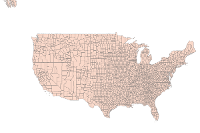

In [16]:
usa_counties

We will use the first [item](https://developers.arcgis.com/python/api-reference/arcgis.gis.toc/#item) for our analysis. Since the item is a [Feature Layer Collection](https://developers.arcgis.com/python/api-reference/arcgis.features.toc/#featurelayercollection), accessing the layers property will give us a list of [Feature layer](https://developers.arcgis.com/python/api-reference/arcgis.features.toc/#featurelayer) objects.

In [17]:
usa_counties_lyr = usa_counties.layers[0]

## Uncover patterns in data

### Describe data


Optionally, the tool can output a ``feature layer`` representing a sample set of features using the ``sample_size`` parameter, or a single polygon feature layer representing the input feature layers' extent by setting the ``extent_output`` parameter to True. The [`describe_dataset`](https://developers.arcgis.com/python/api-reference/arcgis.geoanalytics.summarize_data/#describe-dataset) method provides an overview of big data. By default, the tool outputs a [table](https://developers.arcgis.com/python/api-reference/arcgis.features.toc/#table) layer containing calculated field statistics and a dictionary outlining geometry and time settings for the input layer.


In [18]:
from arcgis.geoanalytics.summarize_data import describe_dataset

In [19]:
description = describe_dataset(input_layer=air_lyr,
                               extent_output=True,
                               sample_size=1000,
                               output_name="Description of air quality data" + str(dt.now().microsecond),
                               return_tuple=True)

In [20]:
description.output_json

{'datasetName': 'air_quality',
 'datasetSource': 'Big Data File Share - Air_Auality_17_18_19',
 'recordCount': 147535365,
 'geometry': {'geometryType': 'Point',
  'sref': {'wkid': 4326},
  'countNonEmpty': 147535365,
  'countEmpty': 0,
  'spatialExtent': {'xmin': -161.767,
   'ymin': 17.953006,
   'xmax': -65.915482,
   'ymax': 64.84568999999999}},
 'time': {'timeType': 'Instant',
  'countNonEmpty': 147535365,
  'countEmpty': 0,
  'temporalExtent': {'start': '2017-01-01 00:00:00.000',
   'end': '2019-04-30 00:00:00.000'}}}

We can also use sql queries to return a subset of records by leveraging the ArcGIS API for Python's Feature Layer object itself. When you run a [`query()`](https://developers.arcgis.com/python/api-reference/arcgis.features.toc/#arcgis.features.FeatureLayer.query) on a FeatureLayer, you get back a FeatureSet object. Calling the `sdf` property of the FeatureSet returns a Spatially Enabled DataFrame object.

In [21]:
description.sample_layer.query().sdf

State_Code  County_Code  Site_Num  Parameter_Code  POC   Latitude  \
0            56           35       700           62201    1  42.486361   
1             9            9        27           88313    1  41.301400   
2            45           79         7           42601    2  34.093959   
3            48          183         1           62101    1  32.378682   
4            19          153        30           44201    1  41.603159   
..          ...          ...       ...             ...  ...        ...   
995          27           53       962           61104    1  44.965242   
996          48           43       101           44201    1  29.302650   
997          19          163        17           62101    1  41.467236   
998          39          145        21           62101    1  38.600611   
999           6           31         4           61103    1  36.102244   

      Longitude  Datum                Parameter_Name  Date_Local  ...  \
0   -110.098861  WGS84             Relative Humidity  2017-07-05  ...   
1    -72.902871  WGS84  Black Carbon PM2.5 at 880 nm  2017-06-08  ...   
2    -80.962304  WGS84             Nitric oxide (NO)  2018-06-28  ...   
3    -94.711811  WGS84           Outdoor Temperature  2018-10-18  ...   
4    -93.643118  WGS84                         Ozone  2017-12-23  ...   
..          ...    ...                           ...         ...  ...   
995  -93.254759  NAD83    Wind Direction - Resultant  2018-07-15  ...   
996 -103.177810  WGS84                         Ozone  2018-02-21  ...   
997  -90.688451  WGS84           Outdoor Temperature  2017-07-16  ...   
998  -82.829782  NAD83           Outdoor Temperature  2017-12-20  ...   
999 -119.565650  NAD83        Wind Speed - Resultant  2017-09-28  ...   

    Method_Type Method_Code  \
0       Non-FRM          60   
1       Non-FRM         894   
2       Non-FRM         674   
3       Non-FRM          40   
4           FEM          47   
..          ...         ...   
995     Non-FRM          63   
996         FEM          47   
997     Non-FRM          40   
998     Non-FRM          40   
999     Non-FRM          20   

                                           Method_Name      State_Name  \
0             Instrumental - Vaisala 435C RH/AT Sensor         Wyoming   
1    Magee AE33/ TAPI M633 Aethalometer - Optical a...     Connecticut   
2    Instrumental - Chemiluminescence Thermo Electr...  South Carolina   
3            INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.           Texas   
4                          INSTRUMENTAL - ULTRA VIOLET            Iowa   
..                                                 ...             ...   
995                        Instrumental - Climatronics       Minnesota   
996                        INSTRUMENTAL - ULTRA VIOLET           Texas   
997          INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.            Iowa   
998          INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.            Ohio   
999                    INSTRUMENTAL - VECTOR SUMMATION      California   

    County_Name  Date_of_Last_Change INSTANT_DATETIME  \
0      Sublette           2017-11-20       2017-07-05   
1     New Haven           2018-01-09       2017-06-08   
2      Richland           2019-02-18       2018-06-28   
3         Gregg           2019-02-18       2018-10-18   
4          Polk           2018-01-12       2017-12-23   
..          ...                  ...              ...   
995    Hennepin           2019-01-17       2018-07-15   
996    Brewster           2018-04-19       2018-02-21   
997       Scott           2017-08-10       2017-07-16   
998      Scioto           2018-01-12       2017-12-20   
999       Kings           2018-03-05       2017-09-28   

                                   globalid OBJECTID  \
0    {4CB48700-32CB-6126-E342-B783681A14AF}        1   
1    {3D99EDC1-EC50-6B1A-508F-A0034CD9DB02}        2   
2    {04ED8FBB-2ADF-AA44-BE30-F61E7A939657}        3   
3    {60E09F2E-891F-EEBD-1253-0FFA407BDEA4}        4   
4    {73E730

In [15]:
m1 = gis.map('USA')
m1

<center>Locations of the Air pollution monitors

In [24]:
m1.add_layer(description.sample_layer)

In [25]:
m1.zoom_to_layer(description.sample_layer)

### Commonly used methods of measurement


The function below groups data by both these parameters. This will help us know the most common type of instrument used to measure each type of parameter.The 'Method Name' attribute contains information about the type of instrument used for measurement. 'Parameter Name' attribute tells about the name or description assigned in AQS to the parameter measured by the monitor. For more details, read [here](https://aqs.epa.gov/aqsweb/airdata/FileFormats/#_hourly_data_files).


In [28]:
def measurement_type():
    from datetime import datetime as dt
    # Load the big data file share layer into a DataFrame
    df = layers[0]
    out = df.groupBy('Method Name','Parameter Name').count()
    out.write.format("webgis").save("common_method_type" + str(dt.now().microsecond)) # Write the final result to our datastore.


When using the geoanalytics and pyspark packages, most functions return analysis results as Spark DataFrame memory structures. You can write these data frames to a data store or process them in a script. This lets you chain multiple geoanalytics and pyspark tools while only writing out the final result, eliminating the need to create any bulky intermediate result layers.

The [`run_python_script`](https://developers.arcgis.com/python/api-reference/arcgis.geoanalytics.manage_data/?highlight=run%20python%20script#arcgis.geoanalytics.manage_data.run_python_script) method executes a Python script directly in an ArcGIS GeoAnalytics server site . The script can create an analysis pipeline by chaining together multiple GeoAnalytics tools without writing intermediate results to a data store. The tool can also distribute Python functionality across the GeoAnalytics server site.


In [ ]:
run_python_script(code=measurement_type, layers=[air_lyr])

The result is saved as a feature layer. We can Search for the saved item using the search() method. Providing the search keyword same as the name we used for writing the result will retrieve the layer.

In [30]:
method_item = gis.content.search('common_method_type')[0]

Accessing the `tables` property of the item will give us the tables object. We will then use `query()` method to read the table as spatially enabled dataframe.

In [34]:
method_df = method_item.tables[0].query(as_df=True)

Sort the values in the decreasing order of the count field.

In [35]:
method_df.sort_values(by='count', ascending=False)

Method_Name  \
89              INSTRUMENTAL - ULTRA VIOLET ABSORPTION   
6            INSTRUMENTAL - ELECTRONIC OR MACHINE AVG.   
158                        INSTRUMENTAL - ULTRA VIOLET   
290                    INSTRUMENTAL - VECTOR SUMMATION   
277                    INSTRUMENTAL - VECTOR SUMMATION   
..                                                 ...   
100  Cooper Environmental Services model Xact 620 -...   
234  Cooper Environmental Services model Xact 620 -...   
245  Cooper Environmental Services model Xact 620 -...   
12   Cooper Environmental Services model Xact 620 -...   
38                                                 The   

                 Parameter_Name     count  \
89                        Ozone  10650047   
6           Outdoor Temperature   9808818   
158                       Ozone   8634142   
290  Wind Direction - Resultant   7348868   
277      Wind Speed - Resultant   7267098   
..                          ...       ...   
100            Vanadium PM10 LC       105   
234                 Tin PM10 LC       105   
245              Silver PM10 LC       105   
12              Calcium PM10 LC       105   
38     PM2.5 - Local Conditions         1   

                                   globalid  OBJECTID  
89   {1C333EB9-AB7D-9ACF-3116-09924757FD90}       112  
6    {17DCDDD0-079F-5BF2-45C3-0BF485355EB0}         8  
158  {EDA2D065-CE9E-2175-F094-8D9C2F6DCEBD}       198  
290  {7154F73E-775C-4C1A-8775-FB99B0074348}       503  
277  {4CCC027A-BABE-DF05-FC6B-9B04F013AF14}       455  
..                                      ...       ...  
100  {ABFA136A-BE6E-79A7-FCA4-608CFABCB77F}       126  
234  {A5B11059-6FD5-EC9A-65E4-6D4B06B25FFF}       339  
245  {E56280AE-5F42-AD31-2D95-C3418CB40985}       356  
12   {6FC4B1BA-A7E4-A69C-BB44-CC26A6FD935B}        17  
38   {E955A26F-4FC1-E8A3-40F1-D85F48D15ED9}        49  

[338 rows x 5 columns]

The table above shows that Ozone is measure using ULTRA VIOLET ABSORPTION method. We can filter the dataframe and search for the ones we are interested in.

### Average PM 2.5 value by county

The function below filters the data by rows that give information about PM2.5 pollutant. To find the average PM2.5 value of each county, we will use [`join_features`](https://developers.arcgis.com/rest/services-reference/join-features.htm) tool. Finally, we will write the output to the datastore.

In [36]:
def average():
    from datetime import datetime as dt
    df = layers[0]
    df = df.filter(df['Parameter Name'] == 'PM2.5 - Local Conditions')
    res = geoanalytics.join_features(target_layer=layers[1], 
                                     join_layer=df, 
                                     join_operation="JoinOneToOne",
                                     summary_fields=[{'statisticType' : 'mean', 'onStatisticField' : 'Sample Measurement'}],
                                     spatial_relationship='Contains')
    res.write.format("webgis").save("average_pm_by_county" + str(dt.now().microsecond))

In [ ]:
run_python_script(average, [air_lyr, usa_counties_lyr])

In [40]:
average_pm_by_county = gis.content.search('average_pm_by_county')[0]

In [41]:
average_pm_by_county

<Item title:"average_pm_by_county63006" type:Feature Layer Collection owner:admin>

In [ ]:
avg_pm = average_pm_by_county.layers[0]

In [20]:
avg_pm.query(as_df=True).columns

Index(['fid', 'state_name', 'fips', 'population', 'pop_sqmi', 'SHAPE__Length1',
       'SHAPE__Area1', 'COUNT', 'MEAN_Sample_Measurement', 'globalid',
       'OBJECTID', 'SHAPE'],
      dtype='object')

In [35]:
m2 = gis.map('USA')
m2

In [32]:
m2.add_layer(avg_pm, {"type": "FeatureLayer",
                      "renderer":"ClassedColorRenderer",
                      "field_name":"MEAN_Sample_Measurement",
                      "class_breaks": 6})

In [33]:
m2.zoom_to_layer(avg_pm)
m2.legend=True

## Prepare time series data

We have observed that the data is spread across US and comes from multiple stations. So we will create a dataframe that contains data points from one station. Additionally, for the purpose of sample, we will only use 2017 and 2018 data to train our model and foreacst on 2019 data. 

The function below creates a column that gives a unique station id to each row of the data. We will then filter by one station id. The timeseries data is expected to have time-dependent variables as attributes of dataframe. For this, we will pivot the table along 'Parameter Name' column. 

In [17]:
def data_processsing():
    from datetime import datetime as dt
    import pyspark.sql.functions as F
    from pyspark.sql.functions import concat, col, lit
    # Load the big data file share layer into a DataFrame.
    df = layers[0] #converts feature layer to spark dataframe
    cols = ['Site Num', 'County Code', 'State Code', 'Date Local', 'Time Local', 'Parameter Name', 'Sample Measurement']
    df = df.select(cols) #create a subset of the dataset with only selected columns
    df = df.withColumn('Site_Num', F.lpad(df['Site Num'], 4, '0'))
    df = df.withColumn('County_Code', F.lpad(df['County Code'], 3, '0'))
    df = df.withColumn('State_Code', F.lpad(df['State Code'], 2, '0'))
    df = df.withColumn('unique_id', F.concat(F.col('State_Code'), F.col('County_Code'), F.col('Site_Num')))
#     drop_cols = ['Site_Num', 'County_Code', 'State_Code', 'Site Num', 'County Code', 'State Code']
    df = df.drop('Site_Num', 'County_Code', 'Staate_Code', 'Site Num', 'County Code', 'State Code')
    df = df.withColumn('datetime', concat(col("Date Local"), lit(" "), col("Time Local")))
#     drop_cols = ['Time Local', 'Date Local']
    df = df.drop('Time Local', 'Date Local')
    df = df.filter(df.unique_id == df.first().unique_id) #filter by only one station
    # group the dataframe by datetime,unique_id field and pivot the table to get variables needed for prediction as columns  
    df = df.groupby(df['datetime'], df['unique_id']).pivot("Parameter Name").avg("Sample Measurement")

    df.write.format("webgis").save("timeseries_data_17_18_19_1station" + str(dt.now().microsecond))

In [ ]:
run_python_script(code=data_processsing, layers=[air_lyr], gis=gis)

In [45]:
data = gis.content.search('timeseries_data_17_18_19_1station')[0]

In [36]:
data

<Item title:"timeseries_data_17_18_19_1station" type:Table Layer owner:admin>

In [41]:
series_data = data.tables[0]

In [42]:
series_data.query(as_df=True)[:5]

Barometric_pressure  Carbon_monoxide  Nitric_oxide__NO_  \
0               1004.3            0.133               0.80   
1                996.3              NaN               0.15   
2                995.8              NaN              31.40   
3                992.6              NaN              -0.05   
4               1007.0            0.148               0.15   

   Nitrogen_dioxide__NO2_  OBJECTID  Outdoor_Temperature  \
0                     1.8         1                 54.3   
1                    12.3         2                 46.4   
2                    21.5         3                 66.2   
3                     2.7         4                 57.4   
4                     6.9         5                 46.2   

   Oxides_of_nitrogen__NOx_  Ozone  PM10_Total_0_10um_STP  \
0                       2.6  0.039                    NaN   
1                      12.6  0.018                    NaN   
2                      55.9  0.007                   50.0   
3                       2.5  0.035                    NaN   
4                       7.0  0.035                    NaN   

   PM2_5___Local_Conditions  Reactive_oxides_of_nitrogen__NOy_  \
0                       3.6                                2.5   
1                      13.2                               13.0   
2                      19.0                               48.5   
3                       NaN                                2.9   
4                       1.7                                6.5   

   Relative_Humidity  Sulfur_dioxide  Wind_Direction___Resultant  \
0               35.0             0.3                        73.0   
1               59.0             0.6                        73.0   
2               69.0             6.4                       150.0   
3               56.0             0.5                       280.0   
4               41.0             0.0                       119.0   

   Wind_Speed___Resultant          datetime  \
0                     4.4  2017-02-13 10:00   
1                     3.5  2017-12-14 22:00   
2                     2.0  2017-05-26 06:00   
3                     5.9  2018-01-22 22:00   
4                     3.3  2017-02-09 17:00   

                                 globalid  unique_id  
0  {35E5A035-34CC-85FB-4955-22F1325C9A40}  010730023  
1  {B078A8A2-237E-4732-4C33-62B9D9F39D57}  010730023  
2  {F45C8958-8061-FA8D-DDC8-9325DB224B77}  010730023  
3  {85796BC1-2FE1-86C6-23BE-E70D9DABD1F7}  010730023  
4  {61606AF2-0DC2-52DF-3B01-B979C11CB37E}  010730023

## Predict PM2.5 using Facebook's Prophet model

The functon below uses [pyspark pandas UDF](https://docs.microsoft.com/en-us/azure/databricks/spark/latest/spark-sql/udf-python-pandas#:~:text=A%20pandas%20user%2Ddefined%20function,%2Da%2Dtime%20Python%20UDFs.) function [fb-prophet model](https://facebook.github.io/prophet/) to foreast pm2.5  hourly value for the month of 2019 January.

In [68]:
def predict_pm25():
    #imports
    from arcgis.gis import GIS
    gis = GIS(profile="your_enterprise_portal")
    from datetime import datetime as dt
    from pyspark.sql.functions import concat, col, lit
    import pandas as pd
    import numpy as np
    from fbprophet import Prophet
    from pyspark.sql.functions import pandas_udf, PandasUDFType
    from pyspark.sql.types import StructType, StructField, DoubleType, IntegerType, FloatType, TimestampType
    import warnings
    warnings.filterwarnings('ignore')
    
    df1 = layers[0] #converts laayer into spark dataframe
    cols = ['Outdoor_Temperature', 'Ozone', 'PM10_Total_0_10um_STP',
        'PM2_5___Local_Conditions',
        'Wind_Direction___Resultant',
        'Wind_Speed___Resultant', 'datetime']
    df1 = df1.select(cols) #filter data by columns needed
    df1 = df1.withColumn('flag', lit(1))
    schema = StructType([StructField('ds', TimestampType(), True), #schema of the resulting dataframe
                         StructField('yhat_lower', FloatType(), True),
                         StructField('yhat_upper', FloatType(), True),
                         StructField('yhat', FloatType(), True),
                         StructField('y', FloatType(), True)])
    
    @pandas_udf(schema, PandasUDFType.GROUPED_MAP)
    def forecast_pm25(df):
        #prepare data 
        df['Date'] = df['datetime'].astype('datetime64[ns]')
        df['year'] = df['Date'].dt.year
        df.set_index('Date', inplace=True) 
        df.sort_index(inplace=True)
        v = pd.date_range(start='2016-12-31 23:00:00', periods=18265, freq='H', closed='right') #get date range
        newdf = pd.DataFrame(index=v) 
        # Fill missing dates 
        historical=pd.merge(newdf, df, how='left', left_index=True, right_index=True)
        historical.interpolate(method='time', inplace=True)
        historical.reset_index(inplace=True)
        historical.rename(columns={'index': 'ds', 'PM2_5___Local_Conditions': 'y'}, inplace=True)
        historical.fillna(0, inplace=True)
        # handle zero and negative values for pm
        for i,item in enumerate(historical['y']):
            if item<=0:
                historical['y'].iloc[i]=historical['y'].iloc[i-1]
            else:
                historical['y'].iloc[i]=item
                
        for i,item in enumerate(historical['PM10_Total_0_10um_STP']):
            if item<=0:
                historical['PM10_Total_0_10um_STP'].iloc[i]=historical['PM10_Total_0_10um_STP'].iloc[i-1]
            else:
                historical['PM10_Total_0_10um_STP'].iloc[i]=item        
         
        for i,item in enumerate(historical['Wind_Speed___Resultant']):
            if item<=0:
                historical['Wind_Speed___Resultant'].iloc[i]=historical['Wind_Speed___Resultant'].iloc[i-1]
            else:
                historical['Wind_Speed___Resultant'].iloc[i]=item
        
        for i,item in enumerate(historical['Wind_Direction___Resultant']):
            if item<=0:
                historical['Wind_Direction___Resultant'].iloc[i]=historical['Wind_Direction___Resultant'].iloc[i-1]
            else:
                historical['Wind_Direction___Resultant'].iloc[i]=item
        # split data into train and test        
        train_df = historical[historical.year != 2019]
        test_df = historical[historical.year == 2019]
        test_df.drop(columns='y', inplace=True)        
        # train model    
        m = Prophet(daily_seasonality=True,
                    weekly_seasonality=True)
        m.add_regressor('PM10_Total_0_10um_STP')
        m.add_regressor('Wind_Speed___Resultant')
        m.add_regressor('Wind_Direction___Resultant')
        m.fit(train_df);
        # predict on test data
        forecast = m.predict(test_df)
        # save plots locally
        plot1 = m.plot(forecast);
        plot2 = m.plot_components(forecast);
        plot1.savefig(r'/home/ags/localdatastore/fbdata/forecast.png')
        plot2.savefig(r'/home/ags/localdatastore/fbdata/cmponents.png')
        # Uncomment the following lines if you want to publish and visualize your graphs as as item.
#         gis = GIS('https://machinename/portal', 'username', 'password')
#         gis.content.add(item_properties={"type": "Image", "title": "Forecast Plot"}, data=r"/home/ags/localdatastore/fbdata/forecast.png")
#         gis.content.add(item_properties={"type": "Image", "title": "Forecase Components2"}, data=r"/home/ags/localdatastore/fbdata/cmponents.png")
        # create df with actual and predicted fields
        cmp_df = forecast.set_index('ds')[['yhat', 'yhat_lower', 'yhat_upper']].join(historical.set_index('ds'))
        cmp_df.reset_index(inplace=True)
        cmp_df = cmp_df[['ds', 'yhat_lower', 'yhat_upper', 'yhat', 'y']]
        return cmp_df
    res = df1.groupby(['flag']).apply(forecast_pm25)

    res.write.format("webgis").save("predicted_results_on_test_data" + str(dt.now().microsecond))

In [ ]:
run_python_script(code=predict_pm25, layers=[series_data])

In [6]:
predicted_item = gis.content.search('predicted_results_on_test_data854829')[0]

In [7]:
predicted_item

<Item title:"predicted_results_on_test_data854829" type:Table Layer owner:admin>

In [7]:
predicted_df = predicted_item[0].tables[0].query().sdf

In [8]:
predicted_df.columns

Index(['ds', 'yhat_lower', 'yhat_upper', 'yhat', 'y', 'globalid', 'OBJECTID'], dtype='object')

In [9]:
predicted_df.head()

ds  yhat_lower  yhat_upper      yhat    y  \
0 2018-12-31 18:30:00    1.357769   15.941110  8.691076  5.5   
1 2018-12-31 19:30:00    1.141512   16.265352  8.773848  5.7   
2 2018-12-31 20:30:00    0.389374   15.927957  7.641061  5.4   
3 2018-12-31 21:30:00   -0.164141   15.033084  7.111085  4.4   
4 2018-12-31 22:30:00   -0.587776   14.489634  7.002420  4.4   

                                 globalid  OBJECTID  
0  {7BCD0AF8-F5B1-4A7E-7118-88589E0A4DAD}        44  
1  {747EF178-8A36-5CCC-74A3-4BAD71DB0553}       244  
2  {7D6C9381-7279-AB10-C5F7-AE138BFD6AE0}       444  
3  {B9BD44CF-F794-87F3-E389-E654CDCE8844}       644  
4  {B7C8C5C7-1C9E-E66A-CA41-39E5F0D601FA}       844

In the above table, y attribute shows the actual value of PM2.5 and yhat shows the values predicted by the trained model.

## Visualize result on Dashboard



We want to visualize our predicted results on a dashboard. To learn more about Dashboards module, visit guide [here](../guide/authoring-arcgis-dashboards/).The `arcgis.apps` module includes [Dashboard](https://developers.arcgis.com/python/api-reference/arcgis.apps.dashboard/) submodule to create dashboards programmatically. The dashboard submodule contains classes for different widgets which can be configured and be used to publish a dashboard.


In [39]:
from arcgis.apps.dashboard import SerialChart, add_column, add_row
from arcgis.apps.dashboard import Dashboard
from arcgis.apps.dashboard import SerialChart

In [50]:
chart = SerialChart(predicted_item,  #Create a serial chart
                    categories_from="features", 
                    title="Forecast of PM2.5 for Janumary 2019") 

chart.data.category_field = "ds" #set category field

chart.category_axis.title = "datetime" #set title for x axis

chart.value_axis.title = "pm2.5" #set title for y axis

#set fields to visualize on y axis
chart.data.add_value_field('y', line_color='#CB4335') 
chart.data.add_value_field('yhat', line_color='#2980B9')
chart.data.add_value_field('yhat_upper', line_color='#CACFD2')
chart.data.add_value_field('yhat_lower', line_color='#CACFD2')

chart.legend.visibility = True 
chart.legend.placement = "side"
chart.category_axis.minimum_period = 'hours'
chart.data.labels = False
chart.data.hover_text = True
chart.data.hover_text = True
chart

In [47]:
agol_gis = GIS('home')

In [48]:
dashboard = Dashboard() #creates a Dashboard object
dashboard.layout = add_row([a_chart]) #adds one chat to the Dashboard
dashboard.save('pm2.5_dashboard_2019_jan',  #publishes the dashboard to the portal
               gis=agol_gis)

<Item title:"pm2.5_dashboard_2019_jan" type:Dashboard owner:api_data_owner>

## Conclusion

In this notebook, we learnt how to use spark with geoanalytics server in order to carry out distributed computation of big data analysis. 

## References

- https://towardsdatascience.com/pyspark-forecasting-with-pandas-udf-and-fb-prophet-e9d70f86d802
- https://stackoverflow.com/questions/61509033/forecasting-with-facebook-prophet-using-pandas-udf-in-spark
- https://databricks.com/blog/2020/01/27/time-series-forecasting-prophet-spark/